------------

# Комментарии

Привет, Сергей!

Я проверила твою работу и оставила в ней комментарии. Комментарии оформлены в таких ячейках и вставлены сразу после ячейки или группы ячеек, к которым относятся. А в самом низу общие комментарии по работе. В общем, аналогично проверке первого проекта.

Надеюсь, тебе все будет понятно :)

Ты справился с проектом)  

------------

Открытие файла
-----
Прочитаем файл __.csv__ с данными по адрессу _/datasets/real_estate_data.csv_, указав как разделитель знак табуляции: '\t', и сохраните результат в датафрейме data_sales. 


In [3]:
import pandas as pd
data_sales = pd.read_csv('/datasets/real_estate_data_old.csv', sep = '\t')
data_sales.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,1564812,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,NaN,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,Сталинский,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,NaN,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,NaN,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Выведем информацию о столбцах, используя функцию _.info()_ и _shape_

In [4]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000

In [5]:
data_sales.shape[0]

23699

Просмотрим какие данные распаложены в столбике _'locality_name'_

In [6]:
data_sales['locality_name'].value_counts()

Санкт-Петербург               15721
посёлок Мурино                  522
посёлок Шушары                  440
Всеволожск                      398
Пушкин                          369
                              ...  
поселок Коробицыно                1
поселок Дружноселье               1
деревня Рапполово                 1
поселок Пчевжа                    1
садовое товарищество Садко        1
Name: locality_name, Length: 364, dtype: int64

  В данных содержится большое количество названий населённых пунктов.
  В задании необходимо проанализировать данные о продаже квартир в __Санкт-Петербурге__

------------

# Комментарии

Отлично) мы видим, что в 15 столбцах из 24 есть пропущенные значения. В выборке содержатся объявления о квартирах, расположенных за пределами Санкт-Петербурга (примерно 34% объявлений). У 49 объявлений (0.2% всей выборки) локация не указана.

Было бы здорово увидеть здесь комментарий к тому, что ты увидел на данном этапе :)

------------

# Первый шаг
Используем функции _.astype(str)_, _str.lower()_ для того чтобы перевести все буквы в строчный тип


In [7]:
data_sales['locality_name'] = data_sales['locality_name'].astype(str)
data_sales['locality_name'] = data_sales['locality_name'].str.lower()
data_sales['locality_name'].head()

0    санкт-петербург
1     посёлок шушары
2    санкт-петербург
3    санкт-петербург
4    санкт-петербург
Name: locality_name, dtype: object

------------

# Комментарии

Хорошо) не хватает пояснения - зачем нужен этот шаг)

Можно было не переводить в тип данных *str* данные в столбце *locality_name*, потому что в *pandas* тип данных *object* это и есть *str* в *python*. Как видно из таблицы ниже, тип данных в этом столбце не изменился в результате операции - он так и остался *object*. [Таблицу соответствия типов данных python и pandas можно посмотреть здесь.](https://pbpython.com/pandas_dtypes.html)

------------

In [8]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000

__Как видно из таблицы имеют пропуски следующие столбцы:__
   - building_series_id
   - ceiling_height
   - floors_total 
   - living_area
   - is_apartment
   - kitchen_area
   - balcony
   - airports_nearest
   - cityCenters_nearest
   - ponds_nearest
   - parks_around3000
   - days_exposition

------------

# Комментарии

Хорошо) много пропусков :( 

------------

Первый шаг
------
На первом шаге проверим на наличие дубликатов методом _duplicated()_

In [9]:
data_sales.duplicated().sum()

0

_Как дубликаты в DF отсутсвуют

------------

# Комментарии

Отлично) хорошо, что дубликатов нет)

Может быть сначало стоило просмотреть все столбцы с типом данных *object* на наличие скрытых дубликатов в виде разных регистров, а потом проверять всю таблицу на дубликаты? Возможно, дубликаты остались :( 

------------

Второй шаг
----
На втором этапе избавимся от пропусков в столбце _is_apartment_

Просмотрим данные которые содержатся в _is_apartment_

In [10]:
data_sales['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

В столбце содержаться значения __False__ , __True__ и __пропуски__

ВЫВОД
----
Так как Апартаменты это специфический вид жилья: [Апартаменты – это нежилые помещения, теоретически это коммерческая недвижимость. Именно поэтому многие апарт-комплексы – это переоборудованные офисные здания](https://www.bfm.ru/news/266485) *То скорее всего таких предложений на рынке будет не большое количество* и __соотвественно пропущенные данные будут иметь значение False__  

------------

# Комментарии

Отлично) можно предположить, что пропуски являются значением **False**, так как поле *is_apartment* заполняли люди и в случае размещения не апартаментов в основном пропускали заполнение этого столбца.

------------

Пропуски изменяем с помощью метода __.fillna(False)__ примененная к столбцу _'is_apartment'_ таблицы _data_sales_

In [11]:
data_sales['is_apartment'] = data_sales['is_apartment'].fillna(False)

In [12]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000 

------------

# Комментарии

Отлично) пропусков стало меньше)

------------

Просмотрим данные которые содержаться в столбце _building_series_id_

In [13]:
data_sales['building_series_id'].value_counts()

1564812.0        2807
1564812           998
1564792.0         374
1564801.0         311
1564806.0         175
                 ... 
121.0               1
Г-2И                1
1 ЛГ - 600.11       1
монолит             1
16                  1
Name: building_series_id, Length: 121, dtype: int64

Как видно в таблице встречаются повторы и смешанный тип данных. Для того чтобы начать работу с данными проведем предобработку:
   - .astype(str)
   - .str.lower()

In [14]:
data_sales['building_series_id'] = data_sales['building_series_id'].astype(str)
data_sales['building_series_id'] = data_sales['building_series_id'].str.lower()

In [15]:
data_sales['building_series_id'].value_counts()

nan               17182
1564812.0          2807
1564812             998
1564792.0           374
1564801.0           311
                  ...  
121 гатчинская        1
12                    1
г-2и                  1
1-335-1               1
1-528-кп-97           1
Name: building_series_id, Length: 110, dtype: int64

Как видно количество повторов среди данных достаточное количество. Упростим данные. 

Серии _121 (гатчинская), 121(гатчинская), 121 гатчинская_ - разное написание одной и той же серии. [Серия панельных домов строится в течение длительного срока, модификация разработанная Гатчинским ДСК на основе 121 серии, здания встречаются в новых спальных районах Питера. Квартиры имеют хорошие планировки, большие площади. Материалы отвечают самым современным требованиям, в том числе тепло- и звукоизоляционным.](https://tipdoma.com/2009/09/gatchinskaya-seriya-121/)

На основании этого можно сделать вывод, что 121 гатчинская и 121 серия очень похожи и их можно объединить в одну группу

In [16]:
data_sales.loc[(data_sales['building_series_id'] == '121 (гатчинская)'), 'building_series_id'] = '121.0'
data_sales.loc[(data_sales['building_series_id'] == '121(гатчинская)'), 'building_series_id'] = '121.0'
data_sales.loc[(data_sales['building_series_id'] == '121 гатчинская'), 'building_series_id'] = '121.0'
data_sales.loc[(data_sales['building_series_id'] == '121'), 'building_series_id'] = '121.0'

Разное написание одного и того же. Поэтому принято решение объединить в одну группу

In [17]:
data_sales.loc[(data_sales['building_series_id'] == 'индивид.'), 'building_series_id'] = 'индивидуальный проект'
data_sales.loc[(data_sales['building_series_id'] == 'индивидуальный'), 'building_series_id'] = 'индивидуальный проект'  

Так как серия домов содержит следующий код [ТТМ-ССС-ХХ](https://ru.wikipedia.org/wiki/%D0%A1%D0%B5%D1%80%D0%B8%D0%B8_%D0%B6%D0%B8%D0%BB%D1%8B%D1%85_%D0%B4%D0%BE%D0%BC%D0%BE%D0%B2), то можно сделать вывод о нехватке одной цифры. _Это подтверждается и повторами которые существуют среди данных_

In [18]:
data_sales.loc[(data_sales['building_series_id'] == '1564812'), 'building_series_id'] = '1564812.0'
data_sales.loc[(data_sales['building_series_id'] == '1564792'), 'building_series_id'] = '1564792.0'
data_sales.loc[(data_sales['building_series_id'] == '1564801'), 'building_series_id'] = '1564801.0'
data_sales.loc[(data_sales['building_series_id'] == '1564806'), 'building_series_id'] = '1564806.0'
data_sales.loc[(data_sales['building_series_id'] == '1564796'), 'building_series_id'] = '1564796.0'
data_sales.loc[(data_sales['building_series_id'] == '1569033'), 'building_series_id'] = '1569033.0'
data_sales.loc[(data_sales['building_series_id'] == '1569038'), 'building_series_id'] = '1569038.0'
data_sales.loc[(data_sales['building_series_id'] == '1568627'), 'building_series_id'] = '1568627.0'
data_sales.loc[(data_sales['building_series_id'] == '1569048'), 'building_series_id'] = '1569048.0'
data_sales.loc[(data_sales['building_series_id'] == '1568643'), 'building_series_id'] = '1568643.0'
data_sales.loc[(data_sales['building_series_id'] == '1569061'), 'building_series_id'] = '1569061.0'
data_sales.loc[(data_sales['building_series_id'] == '1568663'), 'building_series_id'] = '1568663.0'
data_sales.loc[(data_sales['building_series_id'] == '1568700'), 'building_series_id'] = '1568700.0'
data_sales.loc[(data_sales['building_series_id'] == '1569079'), 'building_series_id'] = '1568700.0'
data_sales.loc[(data_sales['building_series_id'] == '1569071'), 'building_series_id'] = '1569071.0'
data_sales.loc[(data_sales['building_series_id'] == '1568675'), 'building_series_id'] = '1568675.0'
data_sales.loc[(data_sales['building_series_id'] == '1569088'), 'building_series_id'] = '1569088.0'
data_sales.loc[(data_sales['building_series_id'] == '1568658'), 'building_series_id'] = '1568658.0'
data_sales.loc[(data_sales['building_series_id'] == '1568690'), 'building_series_id'] = '1568690.0'
data_sales.loc[(data_sales['building_series_id'] == '1569054'), 'building_series_id'] = '1569054.0'
data_sales.loc[(data_sales['building_series_id'] == '1568734'), 'building_series_id'] = '1568734.0'
data_sales.loc[(data_sales['building_series_id'] == '1569041'), 'building_series_id'] = '1569041.0'
data_sales.loc[(data_sales['building_series_id'] == '1569066'), 'building_series_id'] = '1569066.0'
data_sales.loc[(data_sales['building_series_id'] == '1568653'), 'building_series_id'] = '1568653.0'


Аналогичный случай предыдущему, но цифры еще меньше на единицу

In [19]:
data_sales.loc[(data_sales['building_series_id'] == '712041'), 'building_series_id'] = '712041.0'

Для дальнейшего анализа нет необходимости разделения на старый фонд с капитальным ремонтом и без поэтому все данные сведем к наименованию старый фонд

In [20]:
data_sales.loc[(data_sales['building_series_id'] == 'старый фонд с кр'), 'building_series_id'] = 'старый фонд'
data_sales.loc[(data_sales['building_series_id'] == 'старый фонд без кр'), 'building_series_id'] = 'старый фонд'
data_sales.loc[(data_sales['building_series_id'] == 'старый фонд + капремонт'), 'building_series_id'] = 'старый фонд'

Серии г-24 не нашел, но нашел серию г-2и, скорее всего г-24 это опечатка и объедимин данные наименования в одну

In [21]:
data_sales.loc[(data_sales['building_series_id'] == 'г-24'), 'building_series_id'] = 'г-2и'

В данном случаи наблюдается обычный повтор и поэтому просто примим за одну категорию

In [22]:
data_sales.loc[(data_sales['building_series_id'] == '606 серия'), 'building_series_id'] = '606.0'
data_sales.loc[(data_sales['building_series_id'] == '606'), 'building_series_id'] = '606.0'

В данном случаи наблюдается обычный повтор и поэтому просто примим за одну категорию

In [23]:
data_sales.loc[(data_sales['building_series_id'] == '137 серия'), 'building_series_id'] = '137.0'
data_sales.loc[(data_sales['building_series_id'] == '137'), 'building_series_id'] = '137.0'

В данном случае серия 600.11 включает в себя как повторы так и разную эволюцию развития данного проекта.

In [24]:
data_sales.loc[(data_sales['building_series_id'] == '600.11 серия'), 'building_series_id'] = '600.11'
data_sales.loc[(data_sales['building_series_id'] == '1 лг - 600.11'), 'building_series_id'] = '600.11'
data_sales.loc[(data_sales['building_series_id'] == '1-лг-600-i'), 'building_series_id'] = '600.11'
data_sales.loc[(data_sales['building_series_id'] == 'корабль'), 'building_series_id'] = '600.11'
data_sales.loc[(data_sales['building_series_id'] == '1лг-6066м'), 'building_series_id'] = '600.11'
data_sales.loc[(data_sales['building_series_id'] == '600'), 'building_series_id'] = '600.11'

В данном случаи наблюдается обычный повтор и поэтому просто примим за одну категорию

In [25]:
data_sales.loc[(data_sales['building_series_id'] == '504 серия'), 'building_series_id'] = '504.0'
data_sales.loc[(data_sales['building_series_id'] == '504д'), 'building_series_id'] = '504.0'
data_sales.loc[(data_sales['building_series_id'] == '504'), 'building_series_id'] = '504.0'

В данном случаи наблюдается обычный повтор и поэтому просто примим за одну категорию

In [26]:
data_sales.loc[(data_sales['building_series_id'] == 'кирп.монолит'), 'building_series_id'] = 'кирпичный монолит'

[602 серия является продолжением серии 1лг-502](https://ru.wikipedia.org/wiki/1%D0%9B%D0%93-602_(%D1%81%D0%B5%D1%80%D0%B8%D1%8F_%D0%B4%D0%BE%D0%BC%D0%BE%D0%B2))

In [27]:
data_sales.loc[(data_sales['building_series_id'] == '602 серия'), 'building_series_id'] = '1лг-502'

In [28]:
data_sales.loc[(data_sales['building_series_id'] == '1-528 кп - 2'), 'building_series_id'] = '1-528'
data_sales.loc[(data_sales['building_series_id'] == '1-528-кп-97'), 'building_series_id'] = '1-528'


In [29]:
data_sales['building_series_id'].value_counts()

nan          17182
1564812.0     3805
1564792.0      507
1564801.0      403
1564806.0      242
             ...  
ii-18/9          1
663278.0         1
12               1
1-335-1          1
16               1
Name: building_series_id, Length: 61, dtype: int64

------------

# Комментарии

Хорошо) здорово, что ты разобрался во всех этих типах построек :)

------------

Проанализируем данные о характеристиках квартир на основе серий домов методом .pivot_table()

Начнем с высоты квартир

In [30]:
data_sales_height = data_sales.pivot_table(index='building_series_id', values='ceiling_height', aggfunc=['min', 'median', 'mean', 'max'])
data_sales_height.columns = ['min_height', 'median_height', 'mean_height', 'max_height']

In [31]:
data_sales_height

,min_height,median_height,mean_height,max_height
building_series_id,,,,
1-335-1,2.55,2.550,2.550000,2.55
1-528,2.50,2.500,2.500000,2.50
121.0,2.50,2.550,2.564286,2.70
137.0,2.50,2.650,2.627333,2.75
1564792.0,1.00,2.650,2.638455,2.97
1564796.0,2.45,2.600,2.603554,2.80
1564801.0,2.40,2.550,2.553573,3.60
1564806.0,2.50,2.540,2.542890,2.80
1564812.0,2.00,2.750,2.864858,32.00


__Как видно из данных существуют неправильные данные такие как 1м или 1.75м, 100 м, 25 м, 32 м.__


------------

# Комментарии

Почему ты считаешь, что все эти значения неправильные?

------------

Поэтому для заполнения пропущенных данных будем использовать медианное значение по сериям

------------

# Комментарии

Хорошо) в целом медиана и среднее в каждой группе не сильно отличаются.

------------

In [32]:
median_ceiling_height_121 = data_sales[data_sales['building_series_id'] == '121.0']['ceiling_height'].median()
median_ceiling_height_137 = data_sales[data_sales['building_series_id'] == '137.0']['ceiling_height'].median()
median_ceiling_height_1564792 = data_sales[data_sales['building_series_id'] == '1564792.0']['ceiling_height'].median()
median_ceiling_height_1564796 = data_sales[data_sales['building_series_id'] == '1564796.0']['ceiling_height'].median()
median_ceiling_height_1564801 = data_sales[data_sales['building_series_id'] == '1564801.0']['ceiling_height'].median()
median_ceiling_height_1564806 = data_sales[data_sales['building_series_id'] == '1564806.0']['ceiling_height'].median()
median_ceiling_height_1564812 = data_sales[data_sales['building_series_id'] == '1564812.0']['ceiling_height'].median()
median_ceiling_height_1568627 = data_sales[data_sales['building_series_id'] == '1568627.0']['ceiling_height'].median()
median_ceiling_height_1568643 = data_sales[data_sales['building_series_id'] == '1568643.0']['ceiling_height'].median()
median_ceiling_height_1568658 = data_sales[data_sales['building_series_id'] == '1568658.0']['ceiling_height'].median()
median_ceiling_height_1568663 = data_sales[data_sales['building_series_id'] == '1568663.0']['ceiling_height'].median()
median_ceiling_height_1568675 = data_sales[data_sales['building_series_id'] == '1568675.0']['ceiling_height'].median()
median_ceiling_height_1568690 = data_sales[data_sales['building_series_id'] == '1568690.0']['ceiling_height'].median()
median_ceiling_height_1568700 = data_sales[data_sales['building_series_id'] == '1568700.0']['ceiling_height'].median()
median_ceiling_height_1568709 = data_sales[data_sales['building_series_id'] == '1568709.0']['ceiling_height'].median()
median_ceiling_height_1568734 = data_sales[data_sales['building_series_id'] == '1568734.0']['ceiling_height'].median()
median_ceiling_height_1569033 = data_sales[data_sales['building_series_id'] == '1569033.0']['ceiling_height'].median()
median_ceiling_height_1569038 = data_sales[data_sales['building_series_id'] == '1569038.0']['ceiling_height'].median()
median_ceiling_height_1569041 = data_sales[data_sales['building_series_id'] == '1569041.0']['ceiling_height'].median()
median_ceiling_height_1569048 = data_sales[data_sales['building_series_id'] == '1569048.0']['ceiling_height'].median()
median_ceiling_height_1569054 = data_sales[data_sales['building_series_id'] == '1569054.0']['ceiling_height'].median()
median_ceiling_height_1569061 = data_sales[data_sales['building_series_id'] == '1569061.0']['ceiling_height'].median()
median_ceiling_height_1569066 = data_sales[data_sales['building_series_id'] == '1569066.0']['ceiling_height'].median()
median_ceiling_height_1569071 = data_sales[data_sales['building_series_id'] == '1569071.0']['ceiling_height'].median()
median_ceiling_height_1569075 = data_sales[data_sales['building_series_id'] == '1569075.0']['ceiling_height'].median()
median_ceiling_height_1569079 = data_sales[data_sales['building_series_id'] == '1569079.0']['ceiling_height'].median()
median_ceiling_height_1569088 = data_sales[data_sales['building_series_id'] == '1569088.0']['ceiling_height'].median()
median_ceiling_height_502 = data_sales[data_sales['building_series_id'] == '1лг-502']['ceiling_height'].median()
median_ceiling_height_504 = data_sales[data_sales['building_series_id'] == '504.0']['ceiling_height'].median()
median_ceiling_height_60011 = data_sales[data_sales['building_series_id'] == '600.11']['ceiling_height'].median()
median_ceiling_height_606 = data_sales[data_sales['building_series_id'] == '606.0']['ceiling_height'].median()
median_ceiling_height_712041 = data_sales[data_sales['building_series_id'] == '712041.0']['ceiling_height'].median()
median_ceiling_height_nan = data_sales[data_sales['building_series_id'] == 'nan']['ceiling_height'].median()
median_ceiling_height_брежневка = data_sales[data_sales['building_series_id'] == 'брежневка']['ceiling_height'].median()
median_ceiling_height_г = data_sales[data_sales['building_series_id'] == 'г-2и']['ceiling_height'].median()
median_ceiling_height_и = data_sales[data_sales['building_series_id'] == 'индивидуальный проект']['ceiling_height'].median()
median_ceiling_height_к = data_sales[data_sales['building_series_id'] == 'кирпичный']['ceiling_height'].median()
median_ceiling_height_км = data_sales[data_sales['building_series_id'] == 'кирпичный монолит']['ceiling_height'].median()
median_ceiling_height_м = data_sales[data_sales['building_series_id'] == 'монолит']['ceiling_height'].median()
median_ceiling_height_од = data_sales[data_sales['building_series_id'] == 'од-6']['ceiling_height'].median()
median_ceiling_height_п = data_sales[data_sales['building_series_id'] == 'панельный']['ceiling_height'].median()
median_ceiling_height_с = data_sales[data_sales['building_series_id'] == 'сталинский']['ceiling_height'].median()
median_ceiling_height_сф = data_sales[data_sales['building_series_id'] == 'старый фонд']['ceiling_height'].median()
median_ceiling_height_х = data_sales[data_sales['building_series_id'] == 'хрущевка']['ceiling_height'].median()
median_ceiling_height_1568653 = data_sales[data_sales['building_series_id'] == '1568653.0']['ceiling_height'].median()
median_ceiling_height_13 = data_sales[data_sales['building_series_id'] == '663278.0']['ceiling_height'].median()


/opt/conda/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1112: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


------------

# Комментарии

Использовать кириллицу в названиях переменных не очень хорошая идея)

------------

In [33]:
data_sales['ceiling_height'] = pd.to_numeric(data_sales['ceiling_height'], errors='coerce')
data_sales['ceiling_height'] = data_sales['ceiling_height'].fillna(0)
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '121.0'), 'ceiling_height'] = median_ceiling_height_121
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '137.0'), 'ceiling_height'] = median_ceiling_height_137
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1564792.0'), 'ceiling_height'] = median_ceiling_height_1564792
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1564796.0'), 'ceiling_height'] = median_ceiling_height_1564796
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1564801.0'), 'ceiling_height'] = median_ceiling_height_1564801
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1564806.0'), 'ceiling_height'] = median_ceiling_height_1564806
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1564812.0'), 'ceiling_height'] = median_ceiling_height_1564812
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1568627.0'), 'ceiling_height'] = median_ceiling_height_1568627
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1568643.0'), 'ceiling_height'] = median_ceiling_height_1568643
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1568658.0'), 'ceiling_height'] = median_ceiling_height_1568658
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1568663.0'), 'ceiling_height'] = median_ceiling_height_1568663
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1568675.0'), 'ceiling_height'] = median_ceiling_height_1568675
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1568690.0'), 'ceiling_height'] = median_ceiling_height_1568690
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1568700.0'), 'ceiling_height'] = median_ceiling_height_1568700
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1568709.0'), 'ceiling_height'] = median_ceiling_height_1568709
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1568734.0'), 'ceiling_height'] = median_ceiling_height_1568734
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1569033.0'), 'ceiling_height'] = median_ceiling_height_1569033
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1569038.0'), 'ceiling_height'] = median_ceiling_height_1569038
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1569041.0'), 'ceiling_height'] = median_ceiling_height_1569041
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1569048.0'), 'ceiling_height'] = median_ceiling_height_1569048
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1569054.0'), 'ceiling_height'] = median_ceiling_height_1569054
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1569061.0'), 'ceiling_height'] = median_ceiling_height_1569061
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1569066.0'), 'ceiling_height'] = median_ceiling_height_1569066
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1569071.0'), 'ceiling_height'] = median_ceiling_height_1569071
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1569075.0'), 'ceiling_height'] = median_ceiling_height_1569075
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1569079.0'), 'ceiling_height'] = median_ceiling_height_1569079
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1569088.0'), 'ceiling_height'] = median_ceiling_height_1569088
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1лг-502'), 'ceiling_height'] = median_ceiling_height_502
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '504.0'), 'ceiling_height'] = median_ceiling_height_504
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '600.11'), 'ceiling_height'] = median_ceiling_height_60011
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '606.0'), 'ceiling_height'] = median_ceiling_height_606
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '712041.0'), 'ceiling_height'] = median_ceiling_height_712041
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == 'nan'), 'ceiling_height'] = median_ceiling_height_nan
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == 'брежневка'), 'ceiling_height'] = median_ceiling_height_брежневка
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == 'г-2и'), 'ceiling_height'] = median_ceiling_height_г
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == 'индивидуальный проект'), 'ceiling_height'] = median_ceiling_height_и
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == 'кирпичный'), 'ceiling_height'] = median_ceiling_height_к
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == 'кирпичный монолит'), 'ceiling_height'] = median_ceiling_height_км
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == 'монолит'), 'ceiling_height'] = median_ceiling_height_м
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == 'панельный'), 'ceiling_height'] = median_ceiling_height_п
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == 'сталинский'), 'ceiling_height'] = median_ceiling_height_с
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == 'старый фонд'), 'ceiling_height'] = median_ceiling_height_сф
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == 'хрущевка'), 'ceiling_height'] = median_ceiling_height_х
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '1568653.0'), 'ceiling_height'] = median_ceiling_height_1568653
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '663278.0'), 'ceiling_height'] = median_ceiling_height_13


In [34]:
ceiling_height_0 = data_sales[data_sales['ceiling_height'] == 0]
ceiling_height_0

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
1654,7,7,3499999.0,37.0,2017-05-19T00:00:00,1,0.0,9.0,20.50,5,...,6.50,1.0,санкт-петербург,15027.0,13568.0,0.0,NaN,1.0,837.0,34.0
2660,100,10,6650000.0,111.0,2017-05-26T00:00:00,3,0.0,16.0,65.30,7,...,14.00,1.0,санкт-петербург,18750.0,22175.0,0.0,NaN,1.0,649.0,98.0
2888,блочный,11,4300000.0,43.0,2017-07-08T00:00:00,2,0.0,5.0,30.00,1,...,6.00,0.0,санкт-петербург,11035.0,10667.0,0.0,NaN,0.0,NaN,89.0
3487,ii-18/9,3,3100000.0,28.0,2017-08-18T00:00:00,1,0.0,5.0,14.00,5,...,6.30,2.0,пушкин,12736.0,24889.0,1.0,460.0,0.0,NaN,6.0
3511,13,9,6250000.0,84.0,2017-08-21T00:00:00,2,0.0,5.0,46.60,4,...,11.20,0.0,санкт-петербург,31117.0,4617.0,0.0,NaN,0.0,NaN,12.0
4466,монол.панельный,3,4740000.0,59.0,2017-09-28T00:00:00,2,0.0,5.0,31.00,2,...,11.20,0.0,деревня агалатово,NaN,NaN,NaN,NaN,NaN,NaN,5.0
6701,бесшовная технология,13,2730000.0,43.0,2017-04-20T00:00:00,1,0.0,10.0,19.00,5,...,11.00,0.0,всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,163.0
7774,1568708.0,9,1980000.0,31.0,2018-07-14T00:00:00,1,0.0,5.0,18.00,1,...,6.30,NaN,сертолово,NaN,NaN,NaN,NaN,NaN,NaN,32.0
8969,бесшовная технология,3,5800000.0,68.0,2017-01-20T00:00:00,2,0.0,17.0,30.00,7,...,14.00,0.0,санкт-петербург,16295.0,15092.0,1.0,967.0,0.0,NaN,88.0
9528,7,3,4000000.0,41.0,2017-02-16T00:00:00,2,0.0,5.0,27.33,5,...,5.65,1.0,санкт-петербург,38741.0,8001.0,0.0,NaN,1.0,312.0,27.0


У нас осталось 44 незаполненных данных. 
Просмотрим их

   - Для 7 серии высота потолков [2,48](https://ru.wikipedia.org/wiki/%D0%9A-7_(%D1%81%D0%B5%D1%80%D0%B8%D1%8F_%D0%B4%D0%BE%D0%BC%D0%BE%D0%B2))
   - Для блочных домов высота потолка [2.7](http://tsn.spb.ru/information_sale/17.html) 


In [35]:
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == '7'), 'ceiling_height'] = 2.48
data_sales.loc[(data_sales['ceiling_height'] == 0) & (data_sales['building_series_id'] == 'блочный'), 'ceiling_height'] = 2.7


Так как найти информацию по оставшимся данным не получилось то оставшиеся пропуски заполним как медианное значение по всему столбцу

In [36]:
data_sales.loc[(data_sales['ceiling_height'] == 0), 'ceiling_height'] = data_sales['ceiling_height'].median()

In [37]:
ceiling_height_0 = data_sales[data_sales['ceiling_height'] == 0]
ceiling_height_0

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [38]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      23699 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23698 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000

_Как видим мы заполнили данные о высоте потолка._

------------

# Комментарии

Отлично) еще меньше пропусков)

Так понимаю, что связь серии постройки и высоты потолка выходит из того, что у домов одной серии должен быть один стандарт высоты этажа? Объединяя в группы по разным вариациям одной и тойже серии, ты говоришь о том, что и высота потолка у них примерно одинакова.

Давай подумаем над этим методом заполнения пропусков. Тебе извсетно, что в столбце *building_series_id* неизвестны значения около 17 тысяч наблюдений. То есть для около 72% всех наблюдений неизвестна серия постройки. Ты выделяешь эти наблюдения в отдельную группу *nan* и считаешь по ней медиану и среднее высоты потолка. Аналогично, ты выделяешь еще 48 групп построек в зависимости от их  серии и считаешь медиану и среднее высоты потолка. На эти 48 групп построек приходится около 28% всех данных. Все эти группы имеют разный размер по числу наблюдений. Тогда возникает вопрос о репрезентативности этих групп и рассчитанных показателей, ведь какие-то из них состоят всего из пары наблюдений.

После расчета медиан и средних для этих групп можно заметить, что их медианные и средние значения почти одинаковы как между собой, так и в разрезе разных групп. Ты выбираешь способом заполнения медианное значение для каждой группы. Далее у тебя еще остаются незаполненные значения и ты их заполняешь медианой по всему столбцу. Тебе не кажется, что эта медиана будет равна медиане группы *nan*? Ведь эта группа преобладает в выборке. 

Получается, что для заполнения пропусков в столбце с 42% пропусков ( *ceiling_height* ) ты используешь столбец с 72% пропусков ( *building_series_id* ). То есть пытаешься заполнить недостающие данные, использую еще меньший объем данных. Не боишься внести ошибку в данные, в силу того, что в столбце *building_series_id* не указана какая-нибудь серия постройки, способная объяснить 100 метровые потолки, например? То есть отдельная серия, которой соответствует совсем другой уровень высоты потолка, и которой ты приписываешь медианнное значения в примерно 2.6 метра? 

С учетом всего перечисленного, как думаешь, может быть можно было просто заменить все пропуски в столбце *ceiling_height* на медиану по известным значениям этого столбца (результат был бы примерно тотже) или попробовать связать этот столбец с каким-то другим?

------------

Заполним данные об общем Этаже дома
---

In [39]:
data_sales_floors_total = data_sales.pivot_table(index='building_series_id', values='floors_total', aggfunc=['min', 'median', 'mean', 'max'])
data_sales_floors_total.columns = ['min_floors_total', 'median_floors_total', 'mean_floors_total', 'max_floors_total']
data_sales_floors_total

,min_floors_total,median_floors_total,mean_floors_total,max_floors_total
building_series_id,,,,
1-335-1,5.0,5.0,5.000000,5.0
1-528,5.0,5.0,5.000000,5.0
100,16.0,16.0,16.000000,16.0
12,5.0,5.0,5.000000,5.0
121.0,5.0,10.0,11.000000,18.0
...,...,...,...,...
од-6,5.0,5.0,5.000000,5.0
панельный,5.0,9.0,10.222222,24.0
сталинский,3.0,5.0,5.125000,7.0


In [40]:
median_floors_total_nan = data_sales[data_sales['building_series_id'] == 'nan']['floors_total'].median()
max_floors_total_nan = data_sales[data_sales['building_series_id'] == 'nan']['floors_total'].max()
median_floors_total_1564812 = data_sales[data_sales['building_series_id'] == '1564812.0']['floors_total'].median()
max_floors_total_1564812 = data_sales[data_sales['building_series_id'] == '1564812.0']['floors_total'].max()

In [41]:
data_sales['floors_total'] = pd.to_numeric(data_sales['floors_total'], errors='coerce')
data_sales['floors_total'] = data_sales['floors_total'].fillna(0)
data_sales.loc[(data_sales['floors_total'] == 0) & (data_sales['floors_total'] <= median_floors_total_nan) & (data_sales['building_series_id'] == 'nan'), 'floors_total'] = median_floors_total_nan
data_sales.loc[(data_sales['floors_total'] == 0) & (data_sales['floors_total'] > median_floors_total_nan) & (data_sales['building_series_id'] == 'nan'), 'floors_total'] = max_floors_total_nan
data_sales.loc[(data_sales['floors_total'] == 0) & (data_sales['floors_total'] <= median_floors_total_1564812) & (data_sales['building_series_id'] == '1564812.0'), 'floors_total'] = median_floors_total_1564812
data_sales.loc[(data_sales['floors_total'] == 0) & (data_sales['floors_total'] > median_floors_total_1564812) & (data_sales['building_series_id'] == '1564812.0'), 'floors_total'] = max_floors_total_1564812


In [42]:
floors_total_0 = data_sales[data_sales['floors_total'] == 0]
floors_total_0


,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Для запаолнения будем использовать медианное значение этажности дома, и при условии если квартира распаложена ниже. Если квартира распалажена выше то будем приравнимать к макисмальному значению

------------

# Комментарии

Хорошо) ты заполняешь только группы *nan* и *1564812*, потому что только для этих типов построек в столбце *floors_total* присутствуют пропуски?

Для того, чтобы прокомментировать этот шаг, мне не хватает понимания структуры пропусков. Было бы не плохо сначала ее показать)

------------

Заполним пропущенные данные о размере кухни. 
----

Проверим соотвествует ли соотношение __total_area = living_area + kitchen_area_


In [43]:
kitchen = data_sales[['total_area', 'living_area', 'kitchen_area']]

In [44]:
kitchen['summa'] = kitchen['living_area'] + kitchen['kitchen_area']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [45]:
kitchen.head(30)

,total_area,living_area,kitchen_area,summa
0,108.00,51.00,25.00,76.00
1,40.40,18.60,11.00,29.60
2,56.00,34.30,8.30,42.60
3,159.00,NaN,NaN,NaN
4,100.00,32.00,41.00,73.00
5,30.40,14.40,9.10,23.50
6,37.30,10.60,14.40,25.00
7,71.60,NaN,18.90,NaN
8,33.16,15.43,8.81,24.24
9,61.00,43.60,6.50,50.10


Как видим данные в столбцах __total_area__ и __summa__ не совпадают. Поэтому нельзя использовать данный способ вычитания для заполнениядля заполнения части данных 

------------

# Комментарии

Если ничего не видно в абсолютном выражении, можно было посмотреть в относительном, то есть на соотношение жилой площади к общей. Возможно, это соотношение примерно одинаково и получится рассчитать площадь кухни.

------------

In [46]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      23699 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23698 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000

Заполнять данные будим изходя из серии дома

In [47]:
data_sales_kitchen = data_sales.pivot_table(index='building_series_id', values='kitchen_area', aggfunc=['min', 'median', 'mean', 'max'])
data_sales_kitchen.columns = ['min_kitchen', 'median_kitchen', 'mean_kitchen', 'max_kitchen']

In [48]:
data_sales_kitchen

,min_kitchen,median_kitchen,mean_kitchen,max_kitchen
building_series_id,,,,
1-335-1,5.0,5.0,5.000000,5.0
1-528,5.5,5.6,5.600000,5.7
100,10.0,12.0,12.000000,14.0
12,9.0,9.0,9.000000,9.0
121.0,8.0,9.0,10.000000,13.0
...,...,...,...,...
од-6,6.8,6.9,6.900000,7.0
панельный,5.0,8.9,8.732222,12.2
сталинский,7.5,8.4,8.606250,10.5


Как видно достаточно большой разброс данных. Для зполнения пустующих данных будем использовать медианное значение

In [49]:
median_kitchen_area_nan = data_sales[data_sales['building_series_id'] == 'nan']['kitchen_area'].median()
median_kitchen_area_1564812 = data_sales[data_sales['building_series_id'] == '1564812.0']['kitchen_area'].median()
median_kitchen_area_60011 = data_sales[data_sales['building_series_id'] == '600.11']['kitchen_area'].median()
median_kitchen_area_1564792 = data_sales[data_sales['building_series_id'] == '1564792.0']['kitchen_area'].median()
median_kitchen_area_сф = data_sales[data_sales['building_series_id'] == 'старый фонд']['kitchen_area'].median()
median_kitchen_area_1569033 = data_sales[data_sales['building_series_id'] == '1569033.0']['kitchen_area'].median()
median_kitchen_area_1564801 = data_sales[data_sales['building_series_id'] == '1564801.0']['kitchen_area'].median()
median_kitchen_area_1564796 = data_sales[data_sales['building_series_id'] == '1564796.0']['kitchen_area'].median()
median_kitchen_area_1568734 = data_sales[data_sales['building_series_id'] == '1568734.0']['kitchen_area'].median()
median_kitchen_area_1569048 = data_sales[data_sales['building_series_id'] == '1569048.0']['kitchen_area'].median()
median_kitchen_area_км = data_sales[data_sales['building_series_id'] == 'кирпичный монолит']['kitchen_area'].median()
median_kitchen_area_1564806 = data_sales[data_sales['building_series_id'] == '1564806.0']['kitchen_area'].median()
median_kitchen_area_137 = data_sales[data_sales['building_series_id'] == '137.0']['kitchen_area'].median()
median_kitchen_area_504 = data_sales[data_sales['building_series_id'] == '504.0']['kitchen_area'].median()
median_kitchen_area_1568675 = data_sales[data_sales['building_series_id'] == '1568675.0']['kitchen_area'].median()
median_kitchen_area_1569071 = data_sales[data_sales['building_series_id'] == '1569071.0']['kitchen_area'].median()
median_kitchen_area_1568643 = data_sales[data_sales['building_series_id'] == '1568643.0']['kitchen_area'].median()
median_kitchen_area_1569038 = data_sales[data_sales['building_series_id'] == '1569038.0']['kitchen_area'].median()
median_kitchen_area_1569041 = data_sales[data_sales['building_series_id'] == '1569041.0']['kitchen_area'].median()
median_kitchen_area_1568627 = data_sales[data_sales['building_series_id'] == '1568627.0']['kitchen_area'].median()
median_kitchen_area_1568658 = data_sales[data_sales['building_series_id'] == '1568658.0']['kitchen_area'].median()
median_kitchen_area_121 = data_sales[data_sales['building_series_id'] == '121.0']['kitchen_area'].median()
median_kitchen_area_1569079 = data_sales[data_sales['building_series_id'] == '1569079.0']['kitchen_area'].median()
median_kitchen_area_1569066 = data_sales[data_sales['building_series_id'] == '1569066.0']['kitchen_area'].median()
median_kitchen_area_1569054 = data_sales[data_sales['building_series_id'] == '1569054.0']['kitchen_area'].median()
median_kitchen_area_х = data_sales[data_sales['building_series_id'] == 'хрущевка']['kitchen_area'].median()
median_kitchen_area_м = data_sales[data_sales['building_series_id'] == 'монолит']['kitchen_area'].median()
median_kitchen_area_1568653 = data_sales[data_sales['building_series_id'] == '1568653.0']['kitchen_area'].median()



In [50]:
data_sales['kitchen_area'] = pd.to_numeric(data_sales['kitchen_area'], errors='coerce')
data_sales['kitchen_area'] = data_sales['kitchen_area'].fillna(0)
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == 'nan'), 'kitchen_area'] = median_kitchen_area_nan
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '1564812.0'), 'kitchen_area'] = median_kitchen_area_1564812
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '600.11'), 'kitchen_area'] = median_kitchen_area_60011
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '1564792.0'), 'kitchen_area'] = median_kitchen_area_1564792
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == 'старый фонд'), 'kitchen_area'] = median_kitchen_area_сф
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '1569033.0'), 'kitchen_area'] = median_kitchen_area_1569033
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '1564801.0'), 'kitchen_area'] = median_kitchen_area_1564801
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '1564796.0'), 'kitchen_area'] = median_kitchen_area_1564796
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '1568734.0'), 'kitchen_area'] = median_kitchen_area_1568734
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '1569048.0'), 'kitchen_area'] = median_kitchen_area_1569048
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == 'кирпичный монолит'), 'kitchen_area'] = median_kitchen_area_км
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '1564806.0'), 'kitchen_area'] = median_kitchen_area_1564806
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '137.0'), 'kitchen_area'] = median_kitchen_area_137
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '504.0'), 'kitchen_area'] = median_kitchen_area_504
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '1568675.0'), 'kitchen_area'] = median_kitchen_area_1568675
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '1569071.0'), 'kitchen_area'] = median_kitchen_area_1569071
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '1568643.0'), 'kitchen_area'] = median_kitchen_area_1568643
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '1569038.0'), 'kitchen_area'] = median_kitchen_area_1569038
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '1569041.0'), 'kitchen_area'] = median_kitchen_area_1569041
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '1568627.0'), 'kitchen_area'] = median_kitchen_area_1568627
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '1568658.0'), 'kitchen_area'] = median_kitchen_area_1568658
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '121.0'), 'kitchen_area'] = median_kitchen_area_121
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '1569079.0'), 'kitchen_area'] = median_kitchen_area_1569079
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '1569066.0'), 'kitchen_area'] = median_kitchen_area_1569066
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '1569054.0'), 'kitchen_area'] = median_kitchen_area_1569054
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == 'хрущевка'), 'kitchen_area'] = median_kitchen_area_х
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == 'монолит'), 'kitchen_area'] = median_kitchen_area_м
data_sales.loc[(data_sales['kitchen_area'] == 0) & (data_sales['building_series_id'] == '1568653.0'), 'kitchen_area'] = median_kitchen_area_1568653



In [51]:
kitchen_area_0 = data_sales[data_sales['kitchen_area'] == 0]
kitchen_area_0

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Как видно все пропуски  заполненны

In [52]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      23699 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          23698 non-null float64
floors_total            23699 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            23699 non-null bool
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            23699 non-null float64
balcony                 12180 non-null float64
locality_name           23699 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000

------------

# Комментарии

Все тот же комментарий относительно выбора столбца *building_series_id* для заполнения пропусков в других столбцах (внем пропусков больше, чем в столбцах, которые ты заполняешь с его помощью). Стоит ли его использовать?

------------

__Заполним пропущенные данные и жилой площади__

Для начала создадим _data_sales_living_

In [53]:
data_sales_living = data_sales.groupby('building_series_id').agg({'living_area': ['min', 'median', 'mean', 'max'], 'rooms': ['min', 'median', 'mean', 'max']})
data_sales_living.columns = ['min_living', 'median_living', 'mean_living', 'max_living', 'min_living', 'median_rooms', 'mean_rooms', 'rooms']
data_sales_living['living_room'] = data_sales_living['median_living'] / data_sales_living['median_rooms']


In [54]:
data_sales_living

,min_living,median_living,mean_living,max_living,min_living,median_rooms,mean_rooms,rooms,living_room
building_series_id,,,,,,,,,
1-335-1,31.0,31.00,31.000000,31.0,2,2.0,2.000000,2,15.500000
1-528,16.5,17.15,17.150000,17.8,1,1.0,1.000000,1,17.150000
100,46.0,55.65,55.650000,65.3,3,3.0,3.000000,3,18.550000
12,37.0,37.00,37.000000,37.0,2,2.0,2.000000,2,18.500000
121.0,17.0,32.00,31.209091,48.0,1,2.0,1.909091,3,16.000000
...,...,...,...,...,...,...,...,...,...
од-6,15.8,22.80,22.800000,29.8,1,1.5,1.500000,2,15.200000
панельный,14.5,31.25,30.967222,54.7,1,2.0,2.111111,4,15.625000
сталинский,22.2,34.40,39.906250,66.3,1,2.0,2.375000,4,17.200000


In [55]:
data_sales['living_area'] = pd.to_numeric(data_sales['living_area'], errors='coerce')
data_sales['living_area'] = data_sales['living_area'].fillna(0)

In [56]:
living_area_0 = data_sales[data_sales['living_area'] == 0]
living_area_0

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
3,nan,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,0.0,9,...,9.4,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
7,nan,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,0.0,22,...,18.9,2.0,санкт-петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
30,nan,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.65,9.0,0.0,2,...,9.4,NaN,коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
37,nan,10,1990000.0,45.80,2017-10-28T00:00:00,2,2.50,5.0,0.0,1,...,9.4,NaN,поселок городского типа красный бор,NaN,NaN,NaN,NaN,NaN,NaN,196.0
44,nan,13,5350000.0,40.00,2018-11-18T00:00:00,1,2.65,22.0,0.0,3,...,9.4,1.0,санкт-петербург,30471.0,11603.0,1.0,620.0,1.0,1152.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23642,1564792.0,14,5950000.0,80.30,2018-07-03T00:00:00,3,2.70,12.0,0.0,5,...,10.0,NaN,колпино,27933.0,33719.0,0.0,NaN,2.0,562.0,60.0
23663,nan,12,6400000.0,88.00,2018-01-12T00:00:00,4,2.55,10.0,0.0,1,...,9.4,NaN,санкт-петербург,33642.0,13943.0,0.0,NaN,2.0,844.0,59.0
23670,nan,9,2450000.0,45.60,2018-02-08T00:00:00,1,2.80,9.0,0.0,2,...,9.4,NaN,поселок городского типа синявино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23679,nan,0,2500000.0,35.00,2017-12-08T00:00:00,1,2.65,9.0,0.0,4,...,9.4,NaN,сосновый бор,NaN,NaN,NaN,NaN,NaN,NaN,45.0


Как видно существуют пропуски. Зполним их исходя из среднего размера жилокой комнаты и количества комнат 

------------

# Комментарии

Хорошо) то есть в этой таблице, ты также рассчитал размер одной жилой комнаты для медианного размера жилой площади и медианного количества комнат в соответствующем типе постройки, да? 

------------

_Пропуски планируем заменять по формуле среднийразмер комнаты по серии * количество комнат_

In [57]:
data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == 'nan'), 'living_area'] = 14.95 * data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == 'nan'), 'rooms']
data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1564812.0'), 'living_area'] = 17.05 * data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1564812.0'), 'rooms']
data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1564792.0'), 'living_area'] = 15.5 * data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1564792.0'), 'rooms']
data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1569033.0'), 'living_area'] = 14.0 * data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1569033.0'), 'rooms']
data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1564801.0'), 'living_area'] = 12.466667 * data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1564801.0'), 'rooms']
data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1568675.0'), 'living_area'] = 11.900000 * data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1568675.0'), 'rooms']
data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1564806.0'), 'living_area'] = 15.000000 * data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1564806.0'), 'rooms']
data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1564796.0'), 'living_area'] = 16.350000 * data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1564796.0'), 'rooms']
data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1568734.0'), 'living_area'] = 11.500000 * data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1568734.0'), 'rooms']
data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1568627.0'), 'living_area'] = 13.850000 * data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1568627.0'), 'rooms']
data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1568643.0'), 'living_area'] = 13.550000 * data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1568643.0'), 'rooms']
data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1569038.0'), 'living_area'] = 15.150000 * data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1569038.0'), 'rooms']
data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1569066.0'), 'living_area'] = 11.700000 * data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1569066.0'), 'rooms']
data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1569041.0'), 'living_area'] = 9.275000 * data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1569041.0'), 'rooms']
data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1568658.0'), 'living_area'] = 15.350000 * data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1568658.0'), 'rooms']
data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1569071.0'), 'living_area'] = 15.000000 * data_sales.loc[(data_sales['living_area'] == 0) & (data_sales['building_series_id'] == '1569071.0'), 'rooms']


------------

# Комментарии

Хорошо) старайся не использовать цифры, которые можно выписать формулой, в расчетах чего-то еще. Ты можешь допустить ошибку при написании значения, которая пойдет во все твои расчеты дальше. Также код с ручным вводом значений менее универсальный. То есть, если у тебя изменяться исходные данные, ты как-то поменяешь предыдущие шаги, что приведет к изменению рассчитанных значений, тебе придется руками изменять эти обновленные значения :( 

Так понимаю, что в остальных типах построек нет пропущенных значений жилой площади?

------------

In [58]:
living_area_0 = data_sales[data_sales['living_area'] == 0]
living_area_0

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
608,nan,2,1850000.0,25.0,2019-02-20T00:00:00,0,2.65,10.0,0.0,7,...,9.4,NaN,посёлок шушары,NaN,NaN,NaN,NaN,NaN,NaN,29.0
780,nan,9,2600000.0,26.1,2018-02-20T00:00:00,0,2.65,18.0,0.0,8,...,9.4,1.0,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,45.0
2409,nan,4,1980000.0,27.0,2018-03-23T00:00:00,0,2.65,18.0,0.0,4,...,9.4,NaN,посёлок петро-славянка,20605.0,27165.0,0.0,NaN,2.0,663.0,75.0
3147,nan,7,2170000.0,31.0,2017-12-30T00:00:00,0,2.60,12.0,0.0,12,...,9.4,NaN,тосно,NaN,NaN,NaN,NaN,NaN,NaN,198.0
3874,nan,13,1700000.0,21.4,2015-02-11T00:00:00,0,2.70,3.0,0.0,2,...,9.4,NaN,всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4901,nan,5,2200000.0,24.0,2018-10-22T00:00:00,0,2.65,9.0,0.0,6,...,9.4,NaN,посёлок бугры,NaN,NaN,NaN,NaN,NaN,NaN,51.0
5187,nan,5,3300000.0,25.4,2018-11-02T00:00:00,0,2.65,9.0,0.0,15,...,9.4,NaN,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,3.0
5749,nan,20,3590000.0,25.0,2017-08-30T00:00:00,0,2.80,35.0,0.0,26,...,9.4,2.0,санкт-петербург,18732.0,20444.0,0.0,NaN,3.0,80.0,198.0
5958,nan,1,3200000.0,30.3,2018-09-07T00:00:00,0,2.65,9.0,0.0,13,...,9.4,NaN,санкт-петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,68.0
7818,nan,11,3300000.0,27.3,2018-04-06T00:00:00,0,2.65,20.0,0.0,9,...,9.4,2.0,санкт-петербург,15990.0,13853.0,0.0,NaN,1.0,584.0,31.0


Так как видно, что количество комнат не известно и не изсвестно площадь то удалим данные строки методом DROP

In [59]:
data_sales = data_sales.drop([608, 780, 2409, 3147, 3874, 4901, 5187, 5749, 5958, 7818, 8454, 18028, 19392, 23554])
living_area_0 = data_sales[data_sales['living_area'] == 0]
living_area_0

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


------------

# Комментарии

Можно ли было как-то оптимизировать этот шаг? то есть не вводить индексы руками?

------------

Так как при заполнении столбца _living_area_ просмотрим данные о нулевых значений комнат

In [60]:
rooms_0 = data_sales[data_sales['rooms'] == 0]
rooms_0

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
144,nan,1,2450000.0,27.00,2017-03-30T00:00:00,0,2.65,24.0,15.50,2,...,9.4,2.0,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,181.0
349,nan,4,2320000.0,25.00,2017-09-27T00:00:00,0,2.65,14.0,17.00,1,...,9.4,0.0,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,45.0
440,nan,8,2480000.0,27.11,2018-03-12T00:00:00,0,2.65,17.0,24.75,4,...,9.4,2.0,санкт-петербург,38171.0,15015.0,0.0,NaN,2.0,982.0,64.0
508,nan,0,3375000.0,34.40,2017-03-28T00:00:00,0,2.65,26.0,24.30,19,...,9.4,1.0,посёлок парголово,53115.0,19292.0,0.0,NaN,1.0,593.0,430.0
697,nan,12,2500000.0,24.10,2017-12-01T00:00:00,0,2.75,25.0,17.50,21,...,9.4,NaN,деревня кудрово,NaN,NaN,NaN,NaN,NaN,NaN,201.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22877,nan,2,4280000.0,28.00,2017-10-26T00:00:00,0,2.70,19.0,18.00,10,...,9.4,NaN,санкт-петербург,18982.0,7206.0,0.0,NaN,1.0,415.0,151.0
23210,nan,7,3200000.0,26.00,2017-09-01T00:00:00,0,2.65,25.0,18.00,16,...,9.4,0.0,санкт-петербург,11405.0,13222.0,0.0,NaN,1.0,623.0,14.0
23442,nan,0,2500000.0,27.70,2017-09-28T00:00:00,0,2.65,24.0,18.00,4,...,9.4,2.0,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,4.0
23592,nan,10,1450000.0,29.00,2017-11-11T00:00:00,0,2.65,9.0,18.00,8,...,9.4,2.0,никольское,NaN,NaN,NaN,NaN,NaN,NaN,82.0


Проверим относятся ли эти квартиры к студиям

In [61]:
rooms_0['studio']


144       True
349      False
440       True
508      False
697       True
         ...  
22877     True
23210     True
23442    False
23592    False
23637     True
Name: studio, Length: 183, dtype: bool

------------

# Комментарии

Какой вывод сделал на основе увиденного? почему решил совершить все последующие действия?

------------

In [62]:
data_sales.loc[(data_sales['rooms'] == 0) & (data_sales['building_series_id'] == 'nan'), 'rooms'] = data_sales.loc[(data_sales['rooms'] == 0) & (data_sales['building_series_id'] == 'nan'), 'living_area'] / 14.95
data_sales.loc[(data_sales['rooms'] == 0) & (data_sales['building_series_id'] == '1564812.0'), 'rooms'] = data_sales.loc[(data_sales['rooms'] == 0) & (data_sales['building_series_id'] == '1564812.0'), 'living_area'] / 17.05
data_sales.loc[(data_sales['rooms'] == 0) & (data_sales['building_series_id'] == '1564796.0'), 'rooms'] = data_sales.loc[(data_sales['rooms'] == 0) & (data_sales['building_series_id'] == '1564796.0'), 'living_area'] / 16.35
data_sales.loc[(data_sales['rooms'] == 0) & (data_sales['building_series_id'] == 'старый фонд'), 'rooms'] = data_sales.loc[(data_sales['rooms'] == 0) & (data_sales['building_series_id'] == 'старый фонд'), 'living_area'] / 15.666667



In [63]:
rooms_0 = data_sales[data_sales['rooms'] == 0]
rooms_0

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [64]:
rooms_1 = data_sales[data_sales['rooms'] < 1]
rooms_1

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
716,nan,5,1500000.0,17.00,2017-06-07T00:00:00,0.802676,2.70,9.0,12.00,1,...,9.4,0.0,посёлок шушары,18654.0,29846.0,0.0,NaN,0.0,NaN,40.0
1625,nan,7,1980000.0,23.98,2018-02-01T00:00:00,0.702341,2.65,4.0,10.50,3,...,9.4,1.0,поселок станции корнево,NaN,NaN,NaN,NaN,NaN,NaN,120.0
2166,nan,6,2400000.0,23.00,2018-08-14T00:00:00,0.976589,2.65,17.0,14.60,13,...,9.4,1.0,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,28.0
2475,1564812.0,4,2000000.0,27.00,2018-09-07T00:00:00,0.997067,2.60,17.0,17.00,1,...,10.1,NaN,всеволожск,NaN,NaN,NaN,NaN,NaN,NaN,131.0
5855,nan,3,945750.0,19.50,2017-09-18T00:00:00,0.849498,2.76,3.0,12.70,2,...,9.4,0.0,поселок городского типа дубровка,NaN,NaN,NaN,NaN,NaN,NaN,3.0
6408,nan,0,2450000.0,27.00,2017-11-07T00:00:00,0.936455,2.65,23.0,14.00,22,...,9.4,NaN,посёлок мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0
8721,nan,9,3200000.0,26.00,2018-07-16T00:00:00,0.936455,2.65,19.0,14.00,17,...,9.4,1.0,посёлок шушары,11858.0,17411.0,0.0,NaN,0.0,NaN,266.0
8886,1564812.0,10,2450000.0,15.50,2018-08-22T00:00:00,0.586510,2.75,5.0,10.00,2,...,10.1,NaN,санкт-петербург,24326.0,4589.0,0.0,NaN,1.0,446.0,27.0
9412,nan,5,2100000.0,16.00,2017-12-10T00:00:00,0.869565,2.65,6.0,13.00,1,...,9.4,NaN,санкт-петербург,20735.0,2111.0,2.0,228.0,3.0,72.0,3.0
9817,1564812.0,8,2190000.0,19.00,2018-10-12T00:00:00,0.879765,3.50,5.0,15.00,1,...,10.1,NaN,санкт-петербург,29561.0,8264.0,2.0,383.0,1.0,781.0,89.0


In [65]:
data_sales.loc[(data_sales['rooms'] < 1), 'rooms'] = 1

In [66]:
rooms_1 = data_sales[data_sales['rooms'] < 1]
rooms_1

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


Как видно мы избавились от пропусков.

------------

# Комментарии

Отлично) хотелось бы увидеть комментарии к каждому твоему шагу, потому что сейчас я могу только догадываться о том, почему ты делаешь именно так :(

------------

In [67]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23685 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      23685 non-null object
total_images            23685 non-null int64
last_price              23685 non-null float64
total_area              23685 non-null float64
first_day_exposition    23685 non-null object
rooms                   23685 non-null float64
ceiling_height          23684 non-null float64
floors_total            23685 non-null float64
living_area             23685 non-null float64
floor                   23685 non-null int64
is_apartment            23685 non-null bool
studio                  23685 non-null bool
area                    23685 non-null float64
open_plan               23685 non-null bool
kitchen_area            23685 non-null float64
balcony                 12177 non-null float64
locality_name           23685 non-null object
airports_nearest        18149 non-null float64
cityCenters_nearest     18172 non-null float64
parks_around30

Как видно из данных необходимо заполнить данные о балконах

In [68]:
data_sales_balcony = data_sales.pivot_table(index='building_series_id', values='balcony', aggfunc=['min', 'median', 'mean', 'max'])
data_sales_balcony.columns = ['min_balcony', 'median_balcony', 'mean_balcony', 'max_balcony']

In [69]:
data_sales_balcony

,min_balcony,median_balcony,mean_balcony,max_balcony
building_series_id,,,,
1-335-1,0.0,0.0,0.000000,0.0
1-528,0.0,0.5,0.500000,1.0
100,1.0,1.0,1.000000,1.0
12,0.0,0.0,0.000000,0.0
121.0,0.0,0.0,0.363636,2.0
13,0.0,0.0,0.000000,0.0
137.0,0.0,0.0,0.125000,2.0
14,0.0,0.0,0.000000,0.0
15,0.0,0.5,0.500000,1.0


In [70]:
data_sales['balcony'] = pd.to_numeric(data_sales['balcony'], errors='coerce')
data_sales['balcony'] = data_sales['balcony'].fillna(0)
balcony_0 = data_sales[data_sales['balcony'] == 0]
balcony_0

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,1564812.0,20,13000000.0,108.00,2019-03-07T00:00:00,3.0,2.70,16.0,51.00,8,...,25.00,0.0,санкт-петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
2,сталинский,10,5196000.0,56.00,2015-08-20T00:00:00,2.0,3.10,5.0,34.30,4,...,8.30,0.0,санкт-петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,nan,0,64900000.0,159.00,2015-07-24T00:00:00,3.0,2.65,14.0,44.85,9,...,9.40,0.0,санкт-петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,nan,2,10000000.0,100.00,2018-06-19T00:00:00,2.0,3.03,14.0,32.00,13,...,41.00,0.0,санкт-петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,nan,10,2890000.0,30.40,2018-09-10T00:00:00,1.0,2.65,12.0,14.40,5,...,9.10,0.0,городской посёлок янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23693,nan,9,4600000.0,62.40,2016-08-05T00:00:00,3.0,2.60,9.0,40.00,8,...,8.00,0.0,петергоф,45602.0,34104.0,1.0,352.0,1.0,675.0,239.0
23694,1564812.0,9,9700000.0,133.81,2017-03-21T00:00:00,3.0,3.70,5.0,73.30,3,...,13.83,0.0,санкт-петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,nan,14,3100000.0,59.00,2018-01-15T00:00:00,3.0,2.65,5.0,38.00,4,...,8.50,0.0,тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,nan,18,2500000.0,56.70,2018-02-11T00:00:00,2.0,2.65,3.0,29.70,1,...,9.40,0.0,село рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Как видно из таблицы медианное количество балконов для серий 1564806.0 и 1564796.0 равно 2, для все остальных одному

In [71]:
data_sales.loc[(data_sales['balcony'] == 0) & (data_sales['building_series_id'] == '1564806.0'), 'balcony'] = 2
data_sales.loc[(data_sales['balcony'] == 0) & (data_sales['building_series_id'] == '1564796.0'), 'balcony'] = 2
data_sales.loc[(data_sales['balcony'] == 0), 'balcony'] = 1




------------

# Комментарии

Хорошо) тогда можно было не заполнять пропуски в этом столбце нулями и не совершать лишнее действие)

------------

In [72]:
balcony_0 = data_sales[data_sales['balcony'] == 0]
balcony_0

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [73]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23685 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      23685 non-null object
total_images            23685 non-null int64
last_price              23685 non-null float64
total_area              23685 non-null float64
first_day_exposition    23685 non-null object
rooms                   23685 non-null float64
ceiling_height          23684 non-null float64
floors_total            23685 non-null float64
living_area             23685 non-null float64
floor                   23685 non-null int64
is_apartment            23685 non-null bool
studio                  23685 non-null bool
area                    23685 non-null float64
open_plan               23685 non-null bool
kitchen_area            23685 non-null float64
balcony                 23685 non-null float64
locality_name           23685 non-null object
airports_nearest        18149 non-null float64
cityCenters_nearest     18172 non-null float64
parks_around30

Переходим к заполнению  следующего столбца _airports_nearest_

Построим гистограмму и данные характерезующие выбарку по столбику _airports_nearest_

In [74]:
data_sales['airports_nearest'].hist(bins = 500)

In [75]:
data_sales['airports_nearest'].describe()

count    18149.000000
mean     28797.807427
std      12631.880561
min          0.000000
25%      18585.000000
50%      26736.000000
75%      37277.000000
max      84869.000000
Name: airports_nearest, dtype: float64

Анализируя гистограмму и описание выборки мы видим, что существует два пика. 
исходя из двух факторов:
   - что радиус Санкт-Петербурга больше 50 км
   - в выборке присуствует пригород, данные по которому составляют до трети
__Замену пропущенных данных приравняем к значению третего квартиля__

In [76]:
data_sales['airports_nearest'] = pd.to_numeric(data_sales['airports_nearest'], errors='coerce')
data_sales['airports_nearest'] = data_sales['airports_nearest'].fillna(37277.000000)

------------

# Комментарии

Хорошо) то есть заполняем максимально возможным расстоянием, если считать, что квартира расположена в самом городе?

------------

проанализируем данные по заполнению растояния от центра, для этого сделаем выборку в зависимости от местоположения

In [77]:
data_sales_cityCenters_nearest = data_sales.pivot_table(index='locality_name', values='cityCenters_nearest', aggfunc=['min', 'median', 'mean', 'max'])
data_sales_cityCenters_nearest.columns = ['min_cityCenters_nearest', 'median_cityCenters_nearest', 'mean_cityCenters_nearest', 'max_cityCenters_nearest']

In [78]:
data_sales_cityCenters_nearest

,min_cityCenters_nearest,median_cityCenters_nearest,mean_cityCenters_nearest,max_cityCenters_nearest
locality_name,,,,
nan,1322.0,8943.0,11278.902439,41294.0
зеленогорск,51115.0,53381.0,54617.583333,62706.0
колпино,29436.0,32018.0,32113.771513,37477.0
красное село,27317.0,29140.5,30020.284091,41792.0
кронштадт,46657.0,49575.0,49195.726316,51511.0
ломоносов,36816.0,51677.0,50739.969697,61495.0
павловск,31533.0,32683.0,33206.921053,36445.0
петергоф,29815.0,33771.0,35468.925373,49574.0
поселок лисий нос,28246.0,28246.0,28246.000000,28246.0


Запоним имющиеся пропуски

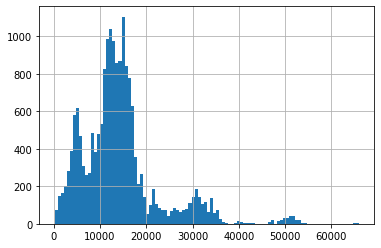

In [79]:
data_sales['cityCenters_nearest'].hist(bins = 100)

In [80]:
data_sales['cityCenters_nearest'].describe()

count    18172.000000
mean     14190.903313
std       8609.185728
min        181.000000
25%       9238.000000
50%      13096.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

В данном случае может быть ошибка, так как влияния растояния в чете питера может привышать растояние пригородов.
Для исправления сделаем данные не содержание данные о питере

In [81]:
data_sales_non_sankt = data_sales[data_sales['locality_name'] != 'санкт-петербург']
data_sales_non_sankt['cityCenters_nearest'].describe()

count     2519.000000
mean     30287.431520
std       9392.977547
min       1322.000000
25%      24302.000000
50%      30310.000000
75%      33641.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

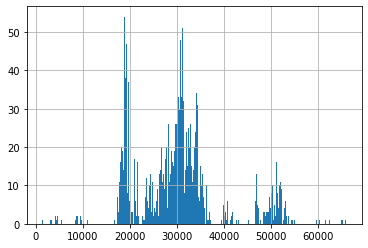

In [82]:
data_sales_non_sankt['cityCenters_nearest'].hist(bins = 500)

Заменим растояние от центра города для квартир поподающих в Питербург равный 13096
для всех остальных с 33641.500000

In [83]:
data_sales['cityCenters_nearest'] = pd.to_numeric(data_sales['cityCenters_nearest'], errors='coerce')
data_sales['cityCenters_nearest'] = data_sales['cityCenters_nearest'].fillna(0)
data_sales.loc[(data_sales['cityCenters_nearest'] == 0) & (data_sales['locality_name'] != 'санкт-петербург'), 'cityCenters_nearest'] = 33641.500000
data_sales.loc[(data_sales['cityCenters_nearest'] == 0) & (data_sales['locality_name'] == 'санкт-петербург'), 'cityCenters_nearest'] = 13096



In [84]:
cityCenters_nearest_0 = data_sales[data_sales['cityCenters_nearest'] == 0]
cityCenters_nearest_0

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition


In [85]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23685 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      23685 non-null object
total_images            23685 non-null int64
last_price              23685 non-null float64
total_area              23685 non-null float64
first_day_exposition    23685 non-null object
rooms                   23685 non-null float64
ceiling_height          23684 non-null float64
floors_total            23685 non-null float64
living_area             23685 non-null float64
floor                   23685 non-null int64
is_apartment            23685 non-null bool
studio                  23685 non-null bool
area                    23685 non-null float64
open_plan               23685 non-null bool
kitchen_area            23685 non-null float64
balcony                 23685 non-null float64
locality_name           23685 non-null object
airports_nearest        23685 non-null float64
cityCenters_nearest     23685 non-null float64
parks_around30

------------

# Комментарии

Хорошо) старайся использовать код вместо самих значений)

------------

Просмотрим данные о столбцах _parks_around3000_ и _parks_nearest_

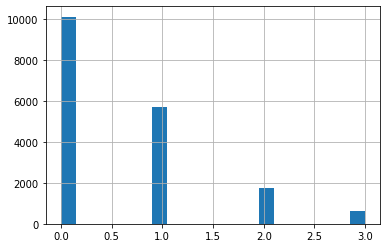

In [86]:
data_sales['parks_around3000'].hist(bins = 20)

In [87]:
data_sales['parks_around3000'].describe()

count    18173.000000
mean         0.611512
std          0.802170
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: parks_around3000, dtype: float64

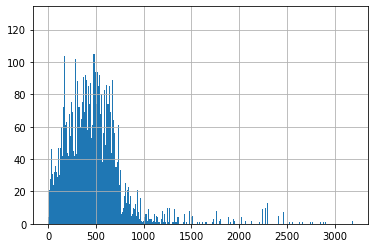

In [88]:
data_sales['parks_nearest'].hist(bins = 500)

In [89]:
data_sales['parks_nearest'].describe()

count    8076.000000
mean      490.759782
std       342.335385
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

In [90]:
data_sales_parks_nearest = data_sales.pivot_table(index='parks_around3000', values='parks_nearest', aggfunc=['min', 'median', 'mean', 'max'])
data_sales_parks_nearest.columns = ['min_parks_nearest', 'median_parks_nearest', 'mean_cityCenters_nearest', 'max_cityCenters_nearest']

In [91]:
data_sales_parks_nearest

,min_parks_nearest,median_parks_nearest,mean_cityCenters_nearest,max_cityCenters_nearest
parks_around3000,,,,
0.0,3013.0,3127.0,3114.250000,3190.0
1.0,1.0,501.5,546.212399,2984.0
2.0,9.0,365.0,370.634230,2747.0
3.0,4.0,307.0,312.251932,700.0


Рассмотрим отдельно растояния распределение парков по Питеру и по пригороду

In [92]:
data_sales_non_sankt_park = data_sales[data_sales['locality_name'] != 'санкт-петербург']
data_sales_sankt_park = data_sales[data_sales['locality_name'] == 'санкт-петербург']

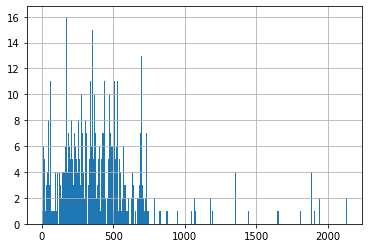

In [93]:
data_sales_non_sankt_park['parks_nearest'].hist(bins = 500)

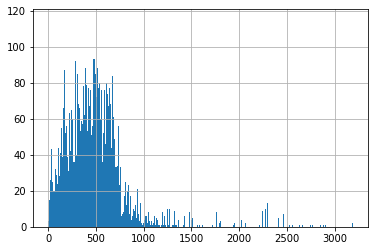

In [94]:
data_sales_sankt_park['parks_nearest'].hist(bins = 500)

In [95]:
data_sales_non_sankt_park['parks_nearest'].describe()

count     795.000000
mean      419.400000
std       305.958725
min         4.000000
25%       228.000000
50%       376.000000
75%       531.000000
max      2131.000000
Name: parks_nearest, dtype: float64

In [96]:
data_sales_sankt_park['parks_nearest'].describe()

count    7281.000000
mean      498.551435
std       345.202674
min         1.000000
25%       295.000000
50%       460.000000
75%       619.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Вывод
----
В итоге видно, что растояние приблизительное совпадает и пропущенное растояние можно заполнить как медианное значение при условии того, что значение в parks_around3000 > 0:
   - Питер - 460 м
   - Пригород - 376 м

In [97]:
data_sales['parks_nearest'] = pd.to_numeric(data_sales['parks_nearest'], errors='coerce')
data_sales['parks_nearest'] = data_sales['parks_nearest'].fillna(0)
data_sales.loc[(data_sales['parks_nearest'] == 0) & (data_sales['locality_name'] != 'санкт-петербург') & (data_sales['parks_around3000'] > 0), 'parks_nearest'] = 376
data_sales.loc[(data_sales['parks_nearest'] == 0) & (data_sales['locality_name'] == 'санкт-петербург') & (data_sales['parks_around3000'] > 0), 'parks_nearest'] = 460



_Исходя из проведенного анализа видно, что наиболее часто возле домов не встреччается парки, второе место занимает 1 парк, поэтому если растояние до 3000 до ближайшего парка, то поставим  1 парк_

In [98]:
data_sales['parks_around3000'] = pd.to_numeric(data_sales['parks_around3000'], errors='coerce')
data_sales['parks_around3000'] = data_sales['parks_around3000'].fillna(0)
data_sales.loc[(data_sales['parks_nearest'] <= 3000) & (data_sales['parks_around3000'] == 0), 'parks_around3000'] = 1


In [99]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23685 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      23685 non-null object
total_images            23685 non-null int64
last_price              23685 non-null float64
total_area              23685 non-null float64
first_day_exposition    23685 non-null object
rooms                   23685 non-null float64
ceiling_height          23684 non-null float64
floors_total            23685 non-null float64
living_area             23685 non-null float64
floor                   23685 non-null int64
is_apartment            23685 non-null bool
studio                  23685 non-null bool
area                    23685 non-null float64
open_plan               23685 non-null bool
kitchen_area            23685 non-null float64
balcony                 23685 non-null float64
locality_name           23685 non-null object
airports_nearest        23685 non-null float64
cityCenters_nearest     23685 non-null float64
parks_around30

по схожему алгоритму просмотрим данные о размещении прудов

In [100]:
data_sales_non_sankt_ponds = data_sales[data_sales['locality_name'] != 'санкт-петербург']
data_sales_sankt_ponds = data_sales[data_sales['locality_name'] == 'санкт-петербург']

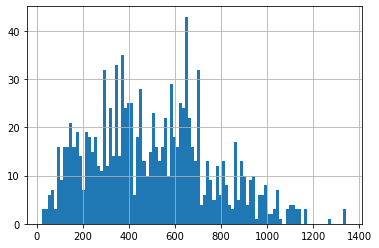

In [101]:
data_sales_non_sankt_ponds['ponds_nearest'].hist(bins = 100)

In [102]:
data_sales_non_sankt_ponds['ponds_nearest'].describe()

count    1126.000000
mean      502.020426
std       258.651736
min        22.000000
25%       300.500000
50%       485.000000
75%       666.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

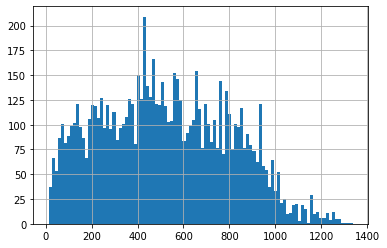

In [103]:
data_sales_sankt_ponds['ponds_nearest'].hist(bins = 100)

In [104]:
data_sales_sankt_ponds['ponds_nearest'].describe()

count    7976.000000
mean      520.350050
std       280.265155
min        13.000000
25%       293.000000
50%       503.000000
75%       738.250000
max      1337.000000
Name: ponds_nearest, dtype: float64

В пригороде Питера растояние до ближайшего пруда больше, чем в Питере. Это прекрасно видно на гистограммах. Поэтому присвоим среднему расстоянию в Питере - 420 м, В пригороде 645

In [105]:
data_sales['ponds_nearest'] = pd.to_numeric(data_sales['ponds_nearest'], errors='coerce')
data_sales['ponds_nearest'] = data_sales['ponds_nearest'].fillna(0)
data_sales.loc[(data_sales['ponds_nearest'] == 0) & (data_sales['locality_name'] != 'санкт-петербург') & (data_sales['ponds_around3000'] > 0), 'ponds_nearest'] = 645
data_sales.loc[(data_sales['ponds_nearest'] == 0) & (data_sales['locality_name'] == 'санкт-петербург') & (data_sales['ponds_around3000'] > 0), 'ponds_nearest'] = 420

Просмотрим данные по колличеству прудов до 3000 м

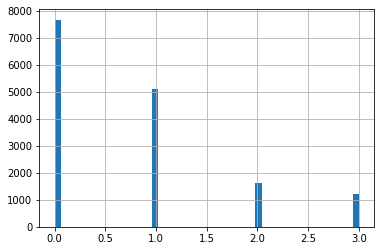

In [106]:
data_sales_sankt_ponds['ponds_around3000'].hist(bins = 50)

In [107]:
data_sales_sankt_ponds['ponds_around3000'].describe()

count    15653.000000
mean         0.770012
std          0.924371
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: ponds_around3000, dtype: float64

если растояние до ближайшего парка до 3000 м, то с вероятностью можно сказать что в округе находится 1 пруд

In [108]:
data_sales['ponds_around3000'] = pd.to_numeric(data_sales['ponds_around3000'], errors='coerce')
data_sales['ponds_around3000'] = data_sales['ponds_around3000'].fillna(0)
data_sales.loc[(data_sales['parks_nearest'] <= 3000) & (data_sales['ponds_around3000'] == 0), 'ponds_around3000'] = 1

In [109]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23685 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      23685 non-null object
total_images            23685 non-null int64
last_price              23685 non-null float64
total_area              23685 non-null float64
first_day_exposition    23685 non-null object
rooms                   23685 non-null float64
ceiling_height          23684 non-null float64
floors_total            23685 non-null float64
living_area             23685 non-null float64
floor                   23685 non-null int64
is_apartment            23685 non-null bool
studio                  23685 non-null bool
area                    23685 non-null float64
open_plan               23685 non-null bool
kitchen_area            23685 non-null float64
balcony                 23685 non-null float64
locality_name           23685 non-null object
airports_nearest        23685 non-null float64
cityCenters_nearest     23685 non-null float64
parks_around30

------------

# Комментарии

Хорошо)

------------

Перед тем как перейти к заполнению данных в столбце _days_exposition_ переведем данные _first_day_exposition_ в формат даты

In [110]:
data_sales['first_day_exposition'] = pd.to_datetime(data_sales['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

In [111]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23685 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      23685 non-null object
total_images            23685 non-null int64
last_price              23685 non-null float64
total_area              23685 non-null float64
first_day_exposition    23685 non-null datetime64[ns]
rooms                   23685 non-null float64
ceiling_height          23684 non-null float64
floors_total            23685 non-null float64
living_area             23685 non-null float64
floor                   23685 non-null int64
is_apartment            23685 non-null bool
studio                  23685 non-null bool
area                    23685 non-null float64
open_plan               23685 non-null bool
kitchen_area            23685 non-null float64
balcony                 23685 non-null float64
locality_name           23685 non-null object
airports_nearest        23685 non-null float64
cityCenters_nearest     23685 non-null float64
parks_

Введем столбцы день месяц год

In [112]:
data_sales['day'] = data_sales['first_day_exposition'].dt.day
data_sales['month'] = data_sales['first_day_exposition'].dt.month
data_sales['year'] = data_sales['first_day_exposition'].dt.year

Построим диаграмму рассеивания количества дней в системе в зависимости от года

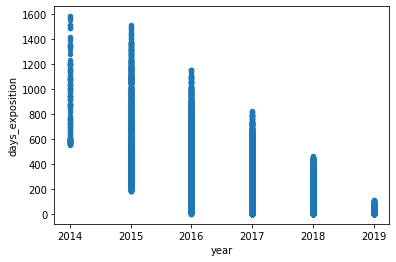

In [113]:
data_sales.plot(x='year', y='days_exposition', kind='scatter')

Как видно наблюдается тенденция к уменьшению числа дней нахождения в системе.

------------

# Комментарии

Как думаешь, с чем это связано?

------------

__Анализ открытых источников показал, что в период 2018-2019 происходило увеличения стоимости квартир на первичном рынке жилья. Данная тенденция привела к увеличению стоимости жилья и на вторичном рынке жилья в 2019-2018 гг.__


Проанализируем как распределялись данные в зависиомости от года и найфдем характеристики распределния количесва дней в системе объявлений в зависимости от года

In [114]:
year_2014 = data_sales[data_sales['year'] == 2014]
year_2015 = data_sales[data_sales['year'] == 2015]
year_2016 = data_sales[data_sales['year'] == 2016]
year_2017 = data_sales[data_sales['year'] == 2017]
year_2018 = data_sales[data_sales['year'] == 2018]
year_2019 = data_sales[data_sales['year'] == 2019]

In [115]:
year_2014['days_exposition'].describe()

count     119.000000
mean      910.983193
std       296.115414
min       554.000000
25%       607.500000
50%       875.000000
75%      1120.000000
max      1580.000000
Name: days_exposition, dtype: float64

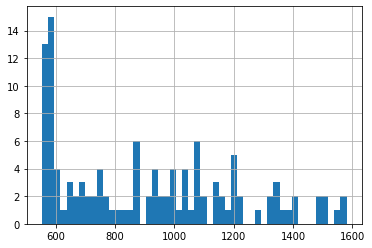

In [116]:
year_2014['days_exposition'].hist(bins = 50)

In [117]:
year_2015['days_exposition'].describe()

count    1121.000000
mean      648.035682
std       318.759788
min       182.000000
25%       389.000000
50%       576.000000
75%       881.000000
max      1512.000000
Name: days_exposition, dtype: float64

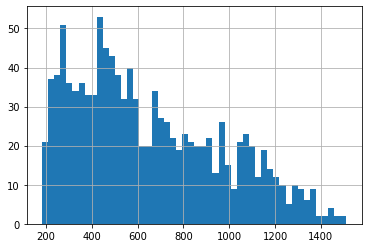

In [118]:
year_2015['days_exposition'].hist(bins = 50)

In [119]:
year_2016['days_exposition'].describe()

count    2716.000000
mean      320.748159
std       256.819800
min         3.000000
25%       114.000000
50%       235.000000
75%       475.250000
max      1153.000000
Name: days_exposition, dtype: float64

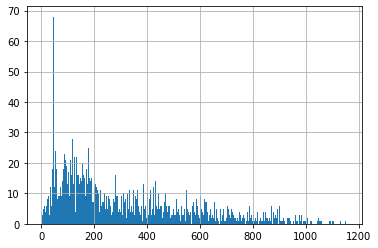

In [120]:
year_2016['days_exposition'].hist(bins = 500)

In [121]:
year_2017['days_exposition'].describe()

count    7917.000000
mean      158.946065
std       153.250657
min         3.000000
25%        45.000000
50%       103.000000
75%       227.000000
max       825.000000
Name: days_exposition, dtype: float64

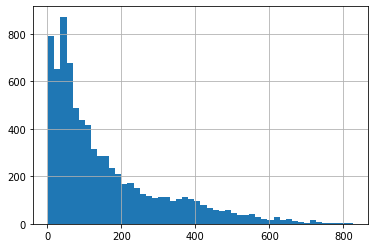

In [122]:
year_2017['days_exposition'].hist(bins = 50)

In [123]:
year_2018['days_exposition'].describe()

count    7552.000000
mean       94.385726
std        85.199201
min         3.000000
25%        34.000000
50%        64.000000
75%       131.000000
max       465.000000
Name: days_exposition, dtype: float64

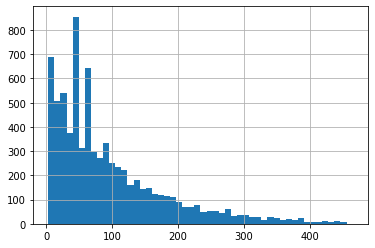

In [124]:
year_2018['days_exposition'].hist(bins = 50)

In [125]:
year_2019['days_exposition'].describe()

count    1081.000000
mean       30.921369
std        23.847166
min         1.000000
25%        12.000000
50%        23.000000
75%        45.000000
max       110.000000
Name: days_exposition, dtype: float64

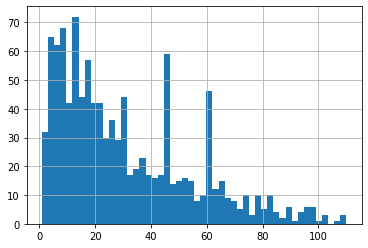

In [126]:
year_2019['days_exposition'].hist(bins = 50)

Данная гипотиза нашла свое отражение. Можно сказать, что в связи с инфляционными ожиданиями происходило снижение нахождения объявления в системе. 

------------

# Комментарии

Хорошо) но может быть, что ответ на вопрос о причине сокращения срока размещения объявления залючается в том, что в принципе, чем ближе к 2019 году размещается объявление, тем меньше оно висит на сайте, так как меньше дней до текущей даты.

Получается, что у всех объявлений есть дата размещения. Но срок нахождения размещения на сайте есть лишь у тех, которые были с него убраны. У всех же остальных объявлений, которые до сих пор висят, срока размещения нет. Тогда получается, что срок размещения сокращается просто потому, что в выборку попадают объявлния, которые уже были убраны с сайта к текущей дате. А чем ближе к текущей дате, тем меньше этот срок.

Для того, чтобы это подтвердить или опровергнуть, нужно посмотреть на структуры пропусков по годам.

------------

Так же стоит отметить, что на покупку квартиры влияет сезоннось. Для ее анализа построим диаграмму рассеивания зависиомтси нахождения объявления от месяца публикации.

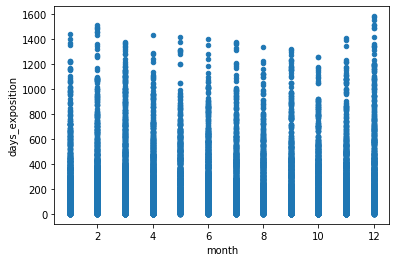

In [127]:
data_sales.plot(x='month', y='days_exposition', kind='scatter')

Как видно гипотиза  о том, что на покупку влияет номер месяца подвердились  не в полной мере. Сезонность присуствует, но не в полной мере.

------------

# Комментарии

Хорошо) что значит, что гипотеза подтвердилась не в полной мере?

------------

Вывод
---
При заполнении пропущенных данных будем опираться значения первый квартиля по году, так как значения имеют ярко выраженное распределение Пуассона

In [128]:
data_sales['days_exposition'] = pd.to_numeric(data_sales['days_exposition'], errors='coerce')
data_sales['days_exposition'] = data_sales['days_exposition'].fillna(1000000000)
data_sales.loc[(data_sales['days_exposition'] == 1000000000) & (data_sales['year'] == 2014), 'days_exposition'] = 607
data_sales.loc[(data_sales['days_exposition'] == 1000000000) & (data_sales['year'] == 2015), 'days_exposition'] = 389
data_sales.loc[(data_sales['days_exposition'] == 1000000000) & (data_sales['year'] == 2016), 'days_exposition'] = 114
data_sales.loc[(data_sales['days_exposition'] == 1000000000) & (data_sales['year'] == 2017), 'days_exposition'] = 45
data_sales.loc[(data_sales['days_exposition'] == 1000000000) & (data_sales['year'] == 2018), 'days_exposition'] = 34
data_sales.loc[(data_sales['days_exposition'] == 1000000000) & (data_sales['year'] == 2018), 'days_exposition'] = 12



In [129]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23685 entries, 0 to 23698
Data columns (total 27 columns):
building_series_id      23685 non-null object
total_images            23685 non-null int64
last_price              23685 non-null float64
total_area              23685 non-null float64
first_day_exposition    23685 non-null datetime64[ns]
rooms                   23685 non-null float64
ceiling_height          23684 non-null float64
floors_total            23685 non-null float64
living_area             23685 non-null float64
floor                   23685 non-null int64
is_apartment            23685 non-null bool
studio                  23685 non-null bool
area                    23685 non-null float64
open_plan               23685 non-null bool
kitchen_area            23685 non-null float64
balcony                 23685 non-null float64
locality_name           23685 non-null object
airports_nearest        23685 non-null float64
cityCenters_nearest     23685 non-null float64
parks_

__Как видно мы закончили заполнение данных, перейдем к работе с заданием__

Задание
---
Посчитайте и добавьте в таблицу:
   - цену квадратного метра;
   - ~~день недели, месяц и год публикации объявления;~~
   - этаж, на котором расположена квартира; варианты — первый, последний, другой;
   - соотношение жилой и общей площади, а также отношение площади кухни к общей.

In [130]:
data_sales['price_square_meter'] = data_sales['last_price'] / data_sales['total_area']


In [131]:
def floor_select(data):
    floor = data['floor']
    floors = data['floors_total']
    if floor == 1:
        return 'первый'
    if floor == floors:
        return 'последний'
    return 'другой'
data_sales['selected_floor'] = data_sales.apply(floor_select, axis=1)


------------

# Комментарии

Хорошо) при проверке соответствия условиям попробуй использовать один цикл проверки, описывая альтернативные условия с помощью *elif*. Это сократит время проверки)

------------

In [132]:
def numeral_floor_select(data):
    floor = data['floor']
    floors = data['floors_total']
    if floor == 1:
        return 1
    if floor == floors:
        return 3
    return 2
data_sales['numeral_selected_floor'] = data_sales.apply(numeral_floor_select, axis=1)

In [133]:
data_sales['ratio_living_total'] = data_sales['living_area'] / data_sales['total_area']

In [134]:
data_sales['ratio_kitchen_total'] = data_sales['kitchen_area'] / data_sales['total_area']

In [135]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23685 entries, 0 to 23698
Data columns (total 32 columns):
building_series_id        23685 non-null object
total_images              23685 non-null int64
last_price                23685 non-null float64
total_area                23685 non-null float64
first_day_exposition      23685 non-null datetime64[ns]
rooms                     23685 non-null float64
ceiling_height            23684 non-null float64
floors_total              23685 non-null float64
living_area               23685 non-null float64
floor                     23685 non-null int64
is_apartment              23685 non-null bool
studio                    23685 non-null bool
area                      23685 non-null float64
open_plan                 23685 non-null bool
kitchen_area              23685 non-null float64
balcony                   23685 non-null float64
locality_name             23685 non-null object
airports_nearest          23685 non-null float64
cityCenters_neare

In [136]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23685 entries, 0 to 23698
Data columns (total 32 columns):
building_series_id        23685 non-null object
total_images              23685 non-null int64
last_price                23685 non-null float64
total_area                23685 non-null float64
first_day_exposition      23685 non-null datetime64[ns]
rooms                     23685 non-null float64
ceiling_height            23684 non-null float64
floors_total              23685 non-null float64
living_area               23685 non-null float64
floor                     23685 non-null int64
is_apartment              23685 non-null bool
studio                    23685 non-null bool
area                      23685 non-null float64
open_plan                 23685 non-null bool
kitchen_area              23685 non-null float64
balcony                   23685 non-null float64
locality_name             23685 non-null object
airports_nearest          23685 non-null float64
cityCenters_neare

------------

# Комментарии

Отлично)

------------

Ответить на следующие вопросы:
---
   - какие пропущенные значения обнаружены;
   - в чём возможные причины возникновения пропусков;
   - в каких столбцах потребовалось изменить тип данных и почему;
   - ~~по какому принципу заполнены пропуски.~~

Какие пропущенные значения обнаружены?
---
Обнаружены пропуски в столбцах:
   - building_series_id
   - rooms
   - ceiling_height
   - living_area
   - is_apartment 
   - locality_name
   - kitchen_area
   - airports_nearest
   - cityCenters_nearest
   - parks_around3000
   - parks_nearest
   - ponds_around3000
   - ponds_nearest
   - days_exposition 

Данные заполняются двумя способами:
   - человеком
   - получены на основе картографических данных
В первом случае человек мог не указать данные при подаче объявления. Причинами данных действий могут быть:
   1. Эти данные отсутсвуют в силу ряда причин, например нет данных о высоте потолка, или человеку было лень искать технический паспорт.
   2. Второе - это данные, которые отсуствуют, например нет балкона или это не аппортаменты и человек просто не пояснял
Во втором случае более интересный вопрос, т.к. теоретически машина делает меньше ошибок и должна была бы заполнить данные, но целью ормирования данных является __отслеживание аномалий и мошеннических действий__. Отсуюда следующие причины:
   1. Сбой в системе: просто не работала, не было данных для сравнения, что требавало ручной корректировки (_Например. Не зарегистрированна улица или номер дома в системе, по которой находится помещение_).
   2. Аномалия, что требует дополнительного обращения внимания на данные
   3. Мошеннические действия со стороны продавца, что требует дополнительных исследований данных вопросов.

------------

# Комментарии

Хорошо)

Что бы выделить абзацы, вставляй двойной Enter :) 

------------

Изменения потребовалис в столцах:
   - building_series_id     
   - last_price              
   - first_day_exposition    
   - floors_total            
   - is_apartment            
   - balcony                
   - airports_nearest        
   - cityCenters_nearest     
   - parks_around3000        
   - parks_nearest          
   - ponds_around3000        
   - ponds_nearest           
   - days_exposition         

In [137]:
data_sales['last_price'] = data_sales['last_price'].astype(int)
data_sales['floors_total'] = data_sales['floors_total'].astype(int)
data_sales['balcony'] = data_sales['balcony'].astype(int)
data_sales['rooms'] = data_sales['rooms'].astype(int)
data_sales['airports_nearest'] = data_sales['airports_nearest'].astype(int)
data_sales['cityCenters_nearest'] = data_sales['cityCenters_nearest'].astype(int)
data_sales['parks_around3000'] = data_sales['parks_around3000'].astype(int)
data_sales['parks_nearest'] = data_sales['parks_nearest'].astype(int)
data_sales['ponds_around3000'] = data_sales['ponds_around3000'].astype(int)
data_sales['ponds_nearest'] = data_sales['ponds_nearest'].astype(int)
data_sales['days_exposition'] = data_sales['days_exposition'].astype(int)

------------

# Комментарии

Хорошо) почему ты изменяешь тип данных?

------------

По какому принципу заполнены пропуски?
---
Описания заполнения пропусков описаны выше. Однако в трех столбиках пропуски не убирались:
   - building_series_id
   - locality_name
   1. Данные  _building_series_id_ можно было востановить с помощью среднего размера комнаты, общей площади, высоты потолка. 
   2. Данные _locality_name_ можно было востановить с помощью cityCenters_nearest, airports_nearest

Эти данные не заполнил по следующим причинам:
   - 2 раза не сохранился код и пришлось много переделывать
   - ограничен во времени - уезжаю в коммандировку
   - методом _.loc_ достаточно объемна писать, (__если бы вы могли подскать алгоритм как можно этот процес упростить__) был бы много....много благодарен.
__Освобожусь постараюсь исправиться.__


------------

# Комментарии

Хорошо)

То есть ты хотел восстановить значения в столбце *building_series_id* на основе других столбцов, в которых также присутствуют пропуски и которые ты заполняешь с использованием столбца *building_series_id*. Было бы интересно посмотреть на то, как ты собирался это сделать)

После проверки первой части проекта, хотела бы тебе посоветовать смотреть на структуру пропусков в данных относительно других столбцов, прежде чем связывать их друг с другом. Для заполнения данных не следует выбирать признак с еще большим количеством пропусков, каким бы идеальным для описания всех остальных признаков он не казался. Ведь ты знаешь о нем еще меньше, чем о другом столбце, который собираешься на его основе заполнить. Так можно внести еще больше путаницы в данные. Если бы у тебя была возможность сначала восстановить пропуски в этом "идеальном" столбце, а потом его использовать при заполнении пропусков в других столбцах, то анализ выглядил бы много убедительней :)

По поводу метода **loc**: в приложении к презентации второй консультации я скинула ссылки на методы более быстрой итерации по датасету. Посмотри их :) Вообще, тебе нужно попробовать автоматизировать процесс заполнения пропусков по группам. Напистать цикл (для понимания того, как это работает) или функцию (то есть этот цикл засунуть в функцию, увеличив тем самым скорость обработки). Вед, по сути, ты заполняешь данные однообразным образом: тебе для соответствующей группы нужно рассчитать соответствующее значения, а потом подставить их в соответствующие строки. Это все можно написать в обобщенном виде и сократить работу :)

------------

Проведите исследовательский анализ данных и ответьте на вопросы
---
   1. Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики и постройте графики. ~~Сколько обычно длится процесс продажи?~~
   2. Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.
   3. Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.
   4. Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.
   5. Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.
   6. Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену?    
   7. Сравните со схожими параметрами квартир типовой планировки.

1.Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики и постройте графики. Сколько обычно длится процесс продажи?
---


На вопрос сколько обычно длится процесс продажи ответил ранее, при заполнении пропусков.
Процесс продаж в первую очередь зависит от года кода эта квартира выставлялсь. Наиболее длительный процесс характерен для __2014 г.__ наиболее быстрый для __2019 г.__ _(в первую очередь связана с ожиданиями покупателей в росте цен на квартире, что подтверждается открытыми источниками)_:
   - 2014 - 607 дней
   - 2015 - 389 дней
   - 2016 - 114 дней
   - 2017 - 45 дней
   - 2018 - 34 дня
   - 2019 - 12 дней.
 

Существует слабая сезонноть при продаже квартир.

------------

# Комментарии

Хорошо) что значит слабая сезонность?

------------

Каковы типичные параметры продаваемых квартир (например, площадь, цена): для ответа на этот вопрос построим таблицу

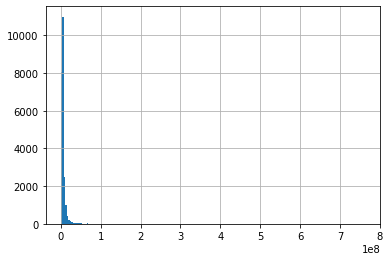

In [138]:
data_sales['last_price'].hist(bins = 200)

In [139]:
data_sales['last_price'].describe()

count    2.368500e+04
mean     6.540940e+06
std      1.088179e+07
min      1.219000e+04
25%      3.415000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Как видно присутсвуют как откровенно низкая стоимость так и откровенно высокая. Из открытых источников известно, что минимальные цены в 2019 г. начинаются от __1.6 млн. рублей__, однако у нас данные начинаются с 2014. С учетом инфляционной поправки установим минимальную цену равную __1,3 млн. руб.__

Так же в DF  содержатся очень высокие цены, при условии того, что __10 млн. рублей__ уже считаетс достаточно дорогой квартиров, то  отсечем цены выше этой суммы.

------------

# Комментарии

Хорошо) Ко всем этим цифрам следует добавить подтверждения :)

------------

In [140]:
analysis_1 = data_sales[(data_sales['last_price'] <= 10000000) & (data_sales['last_price'] >= 1300000)]

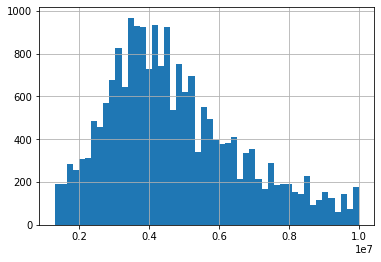

In [141]:
analysis_1['last_price'].hist(bins = 50)

In [142]:
analysis_1['last_price'].describe()

count    2.052000e+04
mean     4.730433e+06
std      1.910011e+06
min      1.300000e+06
25%      3.350000e+06
50%      4.400000e+06
75%      5.850000e+06
max      1.000000e+07
Name: last_price, dtype: float64

Как видно у нас получилась DF с близко к нормальному.

Проанализируем таким же способом данные по стоимости квадратного метра.

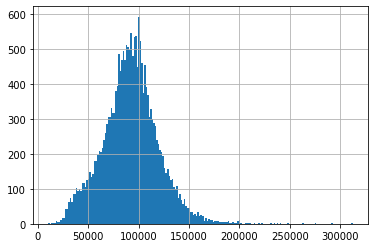

In [143]:
analysis_1['price_square_meter'].hist(bins = 200)

In [144]:
analysis_1['price_square_meter'].describe()

count     20520.000000
mean      92192.372917
std       27475.727202
min       10507.246377
25%       75170.160018
50%       92332.268371
75%      108327.519380
max      312240.000000
Name: price_square_meter, dtype: float64

Для определния взаимосвязи взаимодейтсвия стоимости и цены квадратного метра предлагаю использовать метод _corr()_

In [145]:
analysis_1.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,day,month,year,price_square_meter,numeral_selected_floor,ratio_living_total,ratio_kitchen_total
total_images,1.000000,0.157601,0.089985,0.070036,0.003057,0.000927,0.079433,0.023679,0.013584,-0.026107,...,-0.002543,-0.004253,0.074826,0.009215,0.004092,0.144997,0.110950,0.020380,0.014812,-0.056974
last_price,0.157601,1.000000,0.666109,0.436205,0.072557,0.171916,0.536342,0.116297,0.018703,-0.072232,...,0.192399,0.197661,0.052038,-0.001684,-0.000908,0.015754,0.560332,0.030617,0.018258,-0.192782
total_area,0.089985,0.666109,1.000000,0.803791,0.060091,-0.068424,0.897992,-0.061565,0.021045,-0.114264,...,0.090368,0.039263,0.012248,-0.003084,0.004138,-0.062431,-0.198630,0.005756,0.240321,-0.497923
rooms,0.070036,0.436205,0.803791,1.000000,0.018551,-0.254127,0.906480,-0.192543,-0.005653,-0.080076,...,0.030775,0.008402,0.031443,0.002713,-0.003769,-0.034192,-0.303071,-0.015995,0.597381,-0.669703
ceiling_height,0.003057,0.072557,0.060091,0.018551,1.000000,-0.014314,0.050086,-0.007364,0.081573,0.003932,...,0.049779,0.007001,0.010512,-0.006266,-0.004199,0.002381,0.031702,0.009027,0.004344,0.007535
floors_total,0.000927,0.171916,-0.068424,-0.254127,-0.014314,1.000000,-0.214835,0.668546,-0.020923,0.075812,...,-0.077783,0.020126,-0.037293,-0.002368,0.013125,0.000283,0.324156,0.000978,-0.371648,0.377007
living_area,0.079433,0.536342,0.897992,0.906480,0.050086,-0.214835,1.000000,-0.164097,0.009322,-0.070726,...,0.067871,0.025465,0.024719,-0.000832,-0.002944,-0.048931,-0.265897,0.000274,0.619833,-0.647698
floor,0.023679,0.116297,-0.061565,-0.192543,-0.007364,0.668546,-0.164097,1.000000,-0.013554,0.040668,...,-0.054856,0.016785,-0.024851,0.003299,0.017304,0.000763,0.237388,0.324833,-0.267935,0.266509
is_apartment,0.013584,0.018703,0.021045,-0.005653,0.081573,-0.020923,0.009322,-0.013554,1.000000,-0.003328,...,-0.004011,0.019790,0.002579,0.003891,-0.008809,0.021158,0.008683,-0.002814,-0.008550,0.010655
studio,-0.026107,-0.072232,-0.114264,-0.080076,0.003932,0.075812,-0.070726,0.040668,-0.003328,1.000000,...,-0.006790,-0.003445,-0.004129,-0.013037,0.000234,0.009393,0.055010,-0.010323,0.089986,0.184722


In [146]:
analysis_1_1 = analysis_1[['last_price', 'price_square_meter', 'open_plan', 'kitchen_area', 'balcony', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000']]

In [147]:
analysis_1_1.corr()

,last_price,price_square_meter,open_plan,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000
last_price,1.000000,0.560332,-0.052540,0.416045,0.083307,-0.162457,-0.527679,0.120272
price_square_meter,0.560332,1.000000,0.018611,0.155196,0.020347,-0.197162,-0.610158,0.105410
open_plan,-0.052540,0.018611,1.000000,-0.001114,0.022961,0.000021,0.017941,-0.005661
kitchen_area,0.416045,0.155196,-0.001114,1.000000,0.083370,0.012056,-0.065528,-0.028085
balcony,0.083307,0.020347,0.022961,0.083370,1.000000,0.037205,0.031277,-0.067648
airports_nearest,-0.162457,-0.197162,0.000021,0.012056,0.037205,1.000000,0.390311,-0.002099
cityCenters_nearest,-0.527679,-0.610158,0.017941,-0.065528,0.031277,0.390311,1.000000,-0.131894
parks_around3000,0.120272,0.105410,-0.005661,-0.028085,-0.067648,-0.002099,-0.131894,1.000000


Выводы:
----
На общую стоимость влияет:
   - сильно:
      - размер общей площади
   - средне:
      - размер жилой площади
      - размер жилой площади
      - количество комнат
      - стоимость квадратного метра
      - площадь кухни
   - слабое влияние:
      - растояние до парков
      - наличие парков до 3000 м
      - наличие прудов
      - растояние до ближдайшего пруда
   - обратное сильное влияние: 
      - удаленность от центра (чем дальше от центра, чем ниже общая стоимость)
   - остальные факторы не оказывают существенного влияния.


------------

# Комментарии

Хорошо) не стоит так категорично говорить о том, что все остальные факторы не оказывают существенного влияния на стоимость. Ведь корреляция это мера линейной зависимости между факторами. То есть, если зависимость нелинейна, то корреляция будет несущественной, но это вовсе не значит, что зависимости нет. Поэтому можно перефразировать так: остальные факторы не оказывают существенного *линейного* влияния.

Для того, чтобы увидеть нелинейную связь, стоит построить графики разброса значений 2-ух величин в зависимости друг от друга.

------------

На цену квадратного влияния оказывает:
   - слабое влияние:
      - количество этажей
      - этаж квартиры
      - этаж квартиры
      - наличие парков и их близость
      - наличие прудов и их близость
      - отношение площади к кухне
   - обратное среднее влияние оказывает:
       - удаленность от центра, т.е. чем дальше от центра, тем меньше стоимость квадрата
   - обратное слабое влияние:
       - количество комнат
       - жилая площадь
       - отношения размера жилой к общей
       - общая площадь
   - остальные факторы не оказывают существенного влияния.

Общий вывод по вопросу.
---
В ходе анализа было выявлен, что существенное влияние на процесс продажи оказываают три фактора: __цена, общая площадь, инфляционные ожидания__. Люди __не покупают__ квартиры для получения долгосрочной ренты, спекулятивного долгосрочного характера (повышение стоимости квадратного метра) или в качестве капитального вложения. Основным требованием людей является обеспечения себя жильем по приемлемой стоимости.


Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.
---

In [148]:
analysis_1['locality_name'].value_counts()


санкт-петербург              13099
посёлок мурино                 520
посёлок шушары                 436
всеволожск                     390
колпино                        336
                             ...  
поселок станции вещево           1
коттеджный посёлок лесное        1
поселок станции корнево          1
село шум                         1
деревня лупполово                1
Name: locality_name, Length: 312, dtype: int64

In [149]:
from pymystem3 import Mystem
m = Mystem()
big_str = ''
for row in analysis_1['locality_name']:
    big_str += row
    big_str += ' '
lemmas = m.lemmatize(big_str)
from collections import Counter
Counter(lemmas)


Counter({'поселок': 2525,
         ' ': 25394,
         'шушары': 436,
         'санкт-петербург': 13099,
         'городской': 493,
         'янино': 68,
         '-': 86,
         '1': 68,
         'парголовый': 327,
         'муриный': 588,
         'ломоносов': 133,
         'сертолово': 141,
         'петергоф': 193,
         'пушкин': 331,
         'деревня': 879,
         'кудровый': 250,
         'коммунар': 90,
         'колпино': 336,
         'тип': 318,
         'красный': 185,
         'бор': 96,
         'гатчина': 302,
         'федоровский': 15,
         'выборг': 227,
         'кронштадт': 94,
         'кировск': 83,
         'новый': 183,
         'девяткино': 143,
         'металлострой': 66,
         'лебяжий': 15,
         'сиверский': 27,
         'молодцов': 3,
         'кузьмоловский': 35,
         'садовый': 4,
         'товарищество': 5,
         'ропша': 2,
         'пикколово': 1,
         'всеволожск': 390,
         'волхов': 84,
         'кингисепп': 102,


Удалим повторы

In [150]:
data_sales.loc[(data_sales['locality_name'] == 'посёлок мурино'), 'locality_name'] = 'мурино'
data_sales.loc[(data_sales['locality_name'] == 'поселок мурино'), 'locality_name'] = 'мурино'
data_sales.loc[(data_sales['locality_name'] == 'посёлок шушары'), 'locality_name'] = 'шушары'
data_sales.loc[(data_sales['locality_name'] == 'поселок шушары'), 'locality_name'] = 'шушары'
data_sales.loc[(data_sales['locality_name'] == 'посёлок парголово'), 'locality_name'] = 'парголово'
data_sales.loc[(data_sales['locality_name'] == 'поселок парголово'), 'locality_name'] = 'парголово'
data_sales.loc[(data_sales['locality_name'] == 'деревня кудрово'), 'locality_name'] = 'кудрово'




In [151]:
locality_name = data_sales_height = data_sales.pivot_table(index='locality_name', values='last_price', aggfunc=['count'])
locality_name.columns = ['total']
locality_name = locality_name.sort_values('total')
locality_name_1 = locality_name.query('150 <= total <= 1000 ')
locality_name_1

,total
locality_name,
красное село,178
сестрорецк,183
петергоф,201
выборг,237
гатчина,307
парголово,327
колпино,338
пушкин,369
всеволожск,397


In [152]:
analysis_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20520 entries, 1 to 23698
Data columns (total 32 columns):
building_series_id        20520 non-null object
total_images              20520 non-null int64
last_price                20520 non-null int64
total_area                20520 non-null float64
first_day_exposition      20520 non-null datetime64[ns]
rooms                     20520 non-null int64
ceiling_height            20519 non-null float64
floors_total              20520 non-null int64
living_area               20520 non-null float64
floor                     20520 non-null int64
is_apartment              20520 non-null bool
studio                    20520 non-null bool
area                      20520 non-null float64
open_plan                 20520 non-null bool
kitchen_area              20520 non-null float64
balcony                   20520 non-null int64
locality_name             20520 non-null object
airports_nearest          20520 non-null int64
cityCenters_nearest       2

In [153]:
analysis_2 = analysis_1.query('locality_name in @locality_name_1.index')
analysis_2.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,ponds_nearest,days_exposition,day,month,year,price_square_meter,selected_floor,numeral_selected_floor,ratio_living_total,ratio_kitchen_total
13,1568627.0,20,3550000,42.8,2017-07-01,2,2.56,5,27.0,5,...,298,366,1,7,2017,82943.925234,последний,3,0.630841,0.121495
14,nan,1,4400000,36.0,2016-06-23,1,2.65,6,17.0,1,...,96,203,23,6,2016,122222.222222,первый,1,0.472222,0.222222
28,nan,8,4170000,44.0,2017-12-13,1,2.90,6,20.8,1,...,118,74,13,12,2017,94772.727273,первый,1,0.472727,0.265909
33,nan,8,4800000,73.0,2018-10-15,4,2.65,9,51.6,5,...,0,92,15,10,2018,65753.424658,другой,2,0.706849,0.089041
47,nan,17,3600000,56.1,2018-10-18,3,2.65,4,42.5,3,...,0,179,18,10,2018,64171.122995,другой,2,0.757576,0.101604


In [154]:
analysis_2_1 = analysis_2[[
    'price_square_meter', 
    'total_images', 
    'last_price', 
    'total_area', 
    'rooms', 
    'ceiling_height', 
    'floors_total', 
    'living_area', 
    'floor', 
    'kitchen_area', 
    'balcony', 
    'airports_nearest',
    'cityCenters_nearest',
    'parks_around3000',
    'parks_nearest',
    'ponds_around3000',
    'ponds_nearest',
    'days_exposition',
    'day',
    'month', 
    'year',
    'selected_floor',
    'ratio_living_total',
    'ratio_kitchen_total',
    'selected_floor',
    'numeral_selected_floor'
]]

In [155]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23685 entries, 0 to 23698
Data columns (total 32 columns):
building_series_id        23685 non-null object
total_images              23685 non-null int64
last_price                23685 non-null int64
total_area                23685 non-null float64
first_day_exposition      23685 non-null datetime64[ns]
rooms                     23685 non-null int64
ceiling_height            23684 non-null float64
floors_total              23685 non-null int64
living_area               23685 non-null float64
floor                     23685 non-null int64
is_apartment              23685 non-null bool
studio                    23685 non-null bool
area                      23685 non-null float64
open_plan                 23685 non-null bool
kitchen_area              23685 non-null float64
balcony                   23685 non-null int64
locality_name             23685 non-null object
airports_nearest          23685 non-null int64
cityCenters_nearest       2

In [156]:
analysis_2_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2326 entries, 13 to 23693
Data columns (total 26 columns):
price_square_meter        2326 non-null float64
total_images              2326 non-null int64
last_price                2326 non-null int64
total_area                2326 non-null float64
rooms                     2326 non-null int64
ceiling_height            2326 non-null float64
floors_total              2326 non-null int64
living_area               2326 non-null float64
floor                     2326 non-null int64
kitchen_area              2326 non-null float64
balcony                   2326 non-null int64
airports_nearest          2326 non-null int64
cityCenters_nearest       2326 non-null int64
parks_around3000          2326 non-null int64
parks_nearest             2326 non-null int64
ponds_around3000          2326 non-null int64
ponds_nearest             2326 non-null int64
days_exposition           2326 non-null int64
day                       2326 non-null int64
month  

In [157]:
analysis_2_1.corr()

,price_square_meter,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,day,month,year,ratio_living_total,ratio_kitchen_total,numeral_selected_floor
price_square_meter,1.000000,0.094623,0.457830,-0.232012,-0.306384,0.011292,0.220553,-0.277947,0.183113,0.127927,...,0.192552,0.204099,0.240045,0.092515,0.003831,0.002571,0.140164,-0.222466,0.343045,0.024097
total_images,0.094623,1.000000,0.194338,0.129756,0.101421,0.033179,0.072580,0.114116,0.095155,0.110315,...,-0.029896,-0.016704,-0.038289,0.070292,-0.000997,0.022031,0.137810,0.010702,-0.003094,0.024091
last_price,0.457830,0.194338,1.000000,0.722177,0.520426,0.081297,0.076605,0.605865,0.087625,0.487464,...,0.115245,0.112853,0.163219,0.056320,-0.005982,0.016823,0.027971,0.040302,-0.146413,0.023463
total_area,-0.232012,0.129756,0.722177,1.000000,0.793340,0.082630,-0.046496,0.883976,-0.020968,0.446451,...,-0.021902,-0.028989,-0.010793,0.000867,-0.008873,0.019547,-0.061852,0.184655,-0.398761,0.013093
rooms,-0.306384,0.101421,0.520426,0.793340,1.000000,0.014557,-0.136583,0.903998,-0.097720,0.091581,...,0.012064,-0.008129,0.021496,0.001343,-0.006013,0.013014,-0.071105,0.574355,-0.616237,-0.010394
ceiling_height,0.011292,0.033179,0.081297,0.082630,0.014557,1.000000,-0.017515,0.051433,-0.017209,0.099390,...,-0.018787,0.001918,-0.012173,-0.001415,-0.006511,-0.008455,-0.005199,-0.038967,0.036425,0.013677
floors_total,0.220553,0.072580,0.076605,-0.046496,-0.136583,-0.017515,1.000000,-0.143265,0.661256,0.212044,...,-0.119040,-0.105447,-0.065231,0.111663,-0.006310,0.017088,0.194136,-0.275013,0.317332,-0.010231
living_area,-0.277947,0.114116,0.605865,0.883976,0.903998,0.051433,-0.143265,1.000000,-0.096708,0.165489,...,0.003847,0.001881,0.005130,-0.014136,-0.009834,0.004982,-0.076287,0.593449,-0.589313,0.004594
floor,0.183113,0.095155,0.087625,-0.020968,-0.097720,-0.017209,0.661256,-0.096708,1.000000,0.149621,...,-0.092826,-0.055663,-0.056657,0.064803,-0.022169,0.015302,0.154466,-0.207273,0.206286,0.405898
kitchen_area,0.127927,0.110315,0.487464,0.446451,0.091581,0.099390,0.212044,0.165489,0.149621,1.000000,...,-0.079424,-0.079596,-0.032478,0.087466,0.013896,0.008872,0.050000,-0.415234,0.579984,0.008662


На цену квадратного метра влияния оказывает:
   - среднее влияние общая стоимость влияния
   - слабое влияние:
      - количество этажей
      - этаж квартиры
      - этаж квартиры
      - плущадь кухни
      - наличие парков и их близость
      - наличие прудов и их близость
      - отношение площади к кухне
   - обратное среднее влияние оказывает:
       - удаленность от центра, т.е. чем дальше от центра, тем меньше стоимость квадрата
   - обратное слабое влияние:
       - количество комнат
       - жилая площадь
       - отношения размера жилой к общей
   - остальные факторы не оказывают существенного влияния.

На цену квадратного влияния оказывает:
   - общая стоимость квартиры оказывает среднее влияние
   - слабое влияние:
      - количество этажей
      - этаж квартиры
      - наличие парков и их близость
      - наличие прудов и их близость
      - отношение площади к кухне
   - обратное среднее влияние оказывает:
       - удаленность от центра, т.е. чем дальше от центра, тем меньше стоимость квадрата
   - обратное слабое влияние:
       - количество комнат
       - жилая площадь
       - отношения размера жилой к общей
       - общая площадь
   - остальные факторы не оказывают существенного влияния.

Как изменились харктеристики при анализе 
   - снизилось влияние общей стоимости квартиры
   - слабое влияние:
       - снизилось влияние этажности дома и нахождения квартиры на этаже
       - снизилось влияние размера кухни на стоимость квадратного ментра
       - возрасло значение близкого нахждения парков, прудов в 20 минутной доступности
   - Обратная свзяь показало значение изменение  таких факторов как удаленность от центра, наличие аэропортаотношение жилой к общей
   - стоит обратить влияние на возрастание обратного влияния общей площади и жилой, и, как соотвествие, их соотношения

Проанализируем дополнительно взаимосвязь этажа и стоимости квадратного метра 


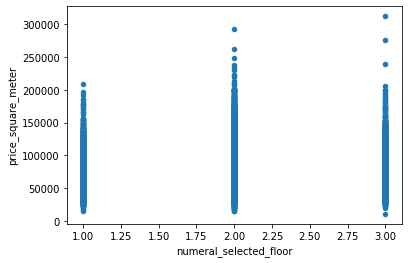

In [158]:
analysis_1.plot(x='numeral_selected_floor', y='price_square_meter', kind='scatter')

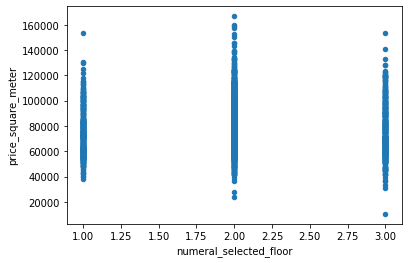

In [159]:
analysis_2_1.plot(x='numeral_selected_floor', y='price_square_meter', kind='scatter')

Как видно, что вборка по общей выборке, стоимость квадратного метра, квартир находящихся на поледнем этаже в среднем более высокая, а в пригороде стоимость квадрата более высокая там, где этаж не совпадает ни с первым ни с поледнем.

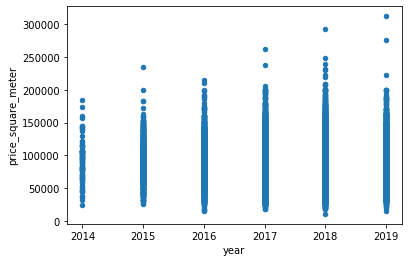

In [160]:
analysis_1.plot(x='year', y='price_square_meter', kind='scatter')

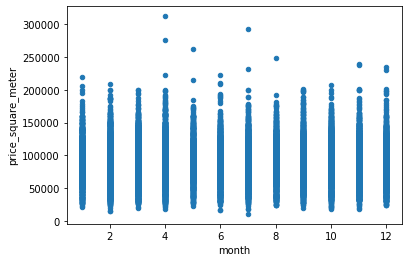

In [161]:
analysis_1.plot(x='month', y='price_square_meter', kind='scatter')

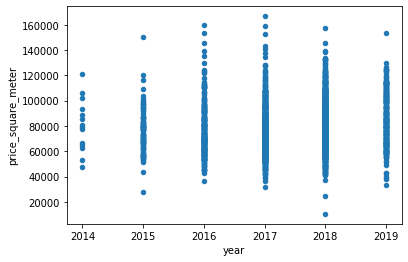

In [162]:
analysis_2_1.plot(x='year', y='price_square_meter', kind='scatter')

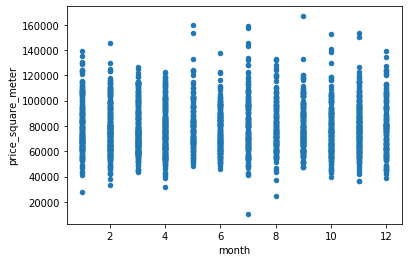

In [163]:
analysis_2_1.plot(x='month', y='price_square_meter', kind='scatter')

1. Как видно стоимость квадратного метра зависит от года размещения, причину этого описывали ранее.
2. Стоимость квадратного метра зависит от месяца и это связано с сезностью реализиции: ниже всего стоимость квадрата в феврале и июле, апреле, лучше всего размещать в декабре, августе, сентябре, мае, январе.

Для регионов пик стоимости квадратного метра пришелся на 2016-2017 гг. На стоимость квадратного метра также влияет месяц, когда было поданно обявления: лучшие для подачи месяцы март, май, июнь, сентябрь, октябрь

------------

# Комментарии

Отлично)

------------

Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.
----

Для начала разделим по удаленности от центра на следующие группы:
   - до 5000 м
   - от 5000 до 10000
   - от 10000 до 20000
   - более 20000


In [164]:
analysis_1_5000 = analysis_1[analysis_1['cityCenters_nearest'] <= 5000]
analysis_1_5000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1119 entries, 24 to 23694
Data columns (total 32 columns):
building_series_id        1119 non-null object
total_images              1119 non-null int64
last_price                1119 non-null int64
total_area                1119 non-null float64
first_day_exposition      1119 non-null datetime64[ns]
rooms                     1119 non-null int64
ceiling_height            1119 non-null float64
floors_total              1119 non-null int64
living_area               1119 non-null float64
floor                     1119 non-null int64
is_apartment              1119 non-null bool
studio                    1119 non-null bool
area                      1119 non-null float64
open_plan                 1119 non-null bool
kitchen_area              1119 non-null float64
balcony                   1119 non-null int64
locality_name             1119 non-null object
airports_nearest          1119 non-null int64
cityCenters_nearest       1119 non-null int64

In [165]:
analysis_1_10000 = analysis_1[(analysis_1['cityCenters_nearest'] > 5000) & (analysis_1['cityCenters_nearest'] <= 10000)]
analysis_1_10000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2133 entries, 4 to 23690
Data columns (total 32 columns):
building_series_id        2133 non-null object
total_images              2133 non-null int64
last_price                2133 non-null int64
total_area                2133 non-null float64
first_day_exposition      2133 non-null datetime64[ns]
rooms                     2133 non-null int64
ceiling_height            2133 non-null float64
floors_total              2133 non-null int64
living_area               2133 non-null float64
floor                     2133 non-null int64
is_apartment              2133 non-null bool
studio                    2133 non-null bool
area                      2133 non-null float64
open_plan                 2133 non-null bool
kitchen_area              2133 non-null float64
balcony                   2133 non-null int64
locality_name             2133 non-null object
airports_nearest          2133 non-null int64
cityCenters_nearest       2133 non-null int64


In [166]:
analysis_1_20000 = analysis_1[(analysis_1['cityCenters_nearest'] > 10000) & (analysis_1['cityCenters_nearest'] <= 20000)]
analysis_1_20000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9744 entries, 1 to 23689
Data columns (total 32 columns):
building_series_id        9744 non-null object
total_images              9744 non-null int64
last_price                9744 non-null int64
total_area                9744 non-null float64
first_day_exposition      9744 non-null datetime64[ns]
rooms                     9744 non-null int64
ceiling_height            9744 non-null float64
floors_total              9744 non-null int64
living_area               9744 non-null float64
floor                     9744 non-null int64
is_apartment              9744 non-null bool
studio                    9744 non-null bool
area                      9744 non-null float64
open_plan                 9744 non-null bool
kitchen_area              9744 non-null float64
balcony                   9744 non-null int64
locality_name             9744 non-null object
airports_nearest          9744 non-null int64
cityCenters_nearest       9744 non-null int64


In [167]:
analysis_1_55000 = analysis_1[(analysis_1['cityCenters_nearest'] > 20000)]
analysis_1_55000.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7524 entries, 5 to 23698
Data columns (total 32 columns):
building_series_id        7524 non-null object
total_images              7524 non-null int64
last_price                7524 non-null int64
total_area                7524 non-null float64
first_day_exposition      7524 non-null datetime64[ns]
rooms                     7524 non-null int64
ceiling_height            7523 non-null float64
floors_total              7524 non-null int64
living_area               7524 non-null float64
floor                     7524 non-null int64
is_apartment              7524 non-null bool
studio                    7524 non-null bool
area                      7524 non-null float64
open_plan                 7524 non-null bool
kitchen_area              7524 non-null float64
balcony                   7524 non-null int64
locality_name             7524 non-null object
airports_nearest          7524 non-null int64
cityCenters_nearest       7524 non-null int64


In [168]:
analysis_1_5000.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,day,month,year,price_square_meter,numeral_selected_floor,ratio_living_total,ratio_kitchen_total
total_images,1.000000,0.107618,0.007178,-0.006529,0.054471,-0.016850,-0.010612,0.042469,0.014782,-0.044060,...,-0.000619,0.017317,0.059397,0.015462,0.018799,0.153480,0.064799,0.025936,-0.048593,-0.004654
last_price,0.107618,1.000000,0.653629,0.490742,0.088346,0.016255,0.573890,0.119757,-0.017367,-0.120261,...,-0.035783,-0.014138,0.089429,-0.035193,-0.060969,0.026682,0.039492,0.189314,0.050556,-0.319473
total_area,0.007178,0.653629,1.000000,0.769857,0.052824,-0.198825,0.896327,-0.054238,-0.001525,-0.112192,...,0.011968,-0.053049,0.006563,0.009918,-0.032584,-0.133151,-0.652609,0.147238,0.198657,-0.511046
rooms,-0.006529,0.490742,0.769857,1.000000,0.002245,-0.263298,0.847413,-0.112118,-0.004513,-0.067204,...,-0.011878,-0.065197,0.001269,-0.013969,-0.027109,-0.094639,-0.578173,0.124051,0.482156,-0.572951
ceiling_height,0.054471,0.088346,0.052824,0.002245,1.000000,-0.072164,0.049630,-0.033234,0.009721,0.029102,...,0.076991,0.022385,0.098039,-0.020299,-0.015228,0.056041,0.011785,0.008582,0.015444,-0.014974
floors_total,-0.016850,0.016255,-0.198825,-0.263298,-0.072164,1.000000,-0.268151,0.595814,0.028669,-0.013210,...,-0.207179,0.103257,-0.021359,0.020623,0.012874,-0.035470,0.343228,-0.014198,-0.308695,0.217738
living_area,-0.010612,0.573890,0.896327,0.847413,0.049630,-0.268151,1.000000,-0.096092,0.026862,-0.063959,...,0.013986,-0.044222,0.004889,0.008932,-0.013025,-0.113332,-0.623576,0.160883,0.575631,-0.615899
floor,0.042469,0.119757,-0.054238,-0.112118,-0.033234,0.595814,-0.096092,1.000000,-0.001184,-0.034036,...,-0.149251,0.069730,-0.000859,-0.003498,-0.013154,-0.024041,0.239876,0.505867,-0.178321,0.094922
is_apartment,0.014782,-0.017367,-0.001525,-0.004513,0.009721,0.028669,0.026862,-0.001184,1.000000,-0.003807,...,0.001802,0.032693,-0.012450,0.014199,-0.048650,0.040484,-0.027050,-0.030260,0.051278,0.005222
studio,-0.044060,-0.120261,-0.112192,-0.067204,0.029102,-0.013210,-0.063959,-0.034036,-0.003807,1.000000,...,0.016552,0.020171,-0.017630,0.022980,0.016080,0.034702,0.064499,-0.022721,0.099710,0.170046


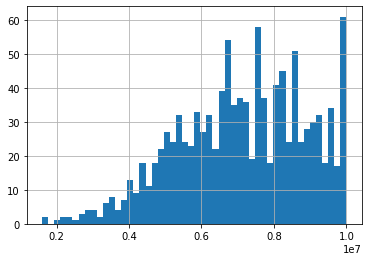

In [169]:
analysis_1_5000['last_price'].hist(bins = 50)

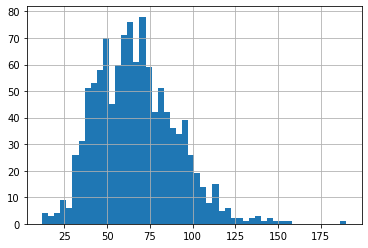

In [170]:
analysis_1_5000['total_area'].hist(bins = 50)

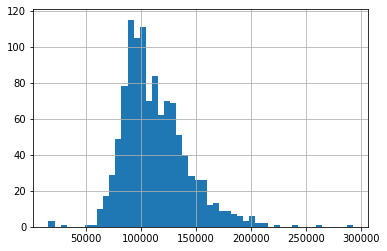

In [171]:
analysis_1_5000['price_square_meter'].hist(bins = 50)

In [172]:
analysis_1_10000.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,day,month,year,price_square_meter,numeral_selected_floor,ratio_living_total,ratio_kitchen_total
total_images,1.000000,0.126311,0.021903,0.028090,0.007629,-0.076093,0.038803,-0.011540,-0.030404,-0.019570,...,0.013106,-0.023972,0.070683,-0.023262,-0.007029,0.141608,0.142743,0.035190,0.035415,-0.039828
last_price,0.126311,1.000000,0.741090,0.451807,0.062616,0.101697,0.566160,0.099625,-0.021985,-0.063613,...,0.175014,0.086270,0.050281,-0.007302,0.030984,0.005595,0.339407,0.042679,-0.041752,-0.171307
total_area,0.021903,0.741090,1.000000,0.803447,0.064973,-0.059802,0.887656,-0.028571,-0.040183,-0.086417,...,0.053931,0.023457,-0.006945,-0.029452,0.039018,-0.077774,-0.343386,0.021445,0.225829,-0.452337
rooms,0.028090,0.451807,0.803447,1.000000,0.031040,-0.282830,0.893399,-0.169414,-0.034370,-0.070997,...,-0.001169,0.000944,0.010129,-0.025632,0.025175,-0.042740,-0.483158,0.031003,0.570975,-0.641440
ceiling_height,0.007629,0.062616,0.064973,0.031040,1.000000,-0.029822,0.079522,0.001006,0.365362,0.008027,...,-0.000610,-0.000975,0.002091,-0.016543,-0.002781,0.021705,0.004409,-0.026408,0.070762,-0.002750
floors_total,-0.076093,0.101697,-0.059802,-0.282830,-0.029822,1.000000,-0.231705,0.657709,-0.012325,0.058963,...,-0.039462,-0.087105,-0.051508,0.027211,-0.016945,0.015067,0.233572,-0.029741,-0.403918,0.358179
living_area,0.038803,0.566160,0.887656,0.893399,0.079522,-0.231705,1.000000,-0.131408,-0.026644,-0.050872,...,0.011255,-0.002988,0.009117,-0.031588,0.027108,-0.059479,-0.440429,0.033820,0.625504,-0.639035
floor,-0.011540,0.099625,-0.028571,-0.169414,0.001006,0.657709,-0.131408,1.000000,-0.015832,0.006962,...,-0.032201,-0.044883,-0.029131,0.038295,-0.015637,0.029293,0.185352,0.317443,-0.237368,0.216118
is_apartment,-0.030404,-0.021985,-0.040183,-0.034370,0.365362,-0.012325,-0.026644,-0.015832,1.000000,-0.002490,...,0.034066,0.008709,-0.008274,-0.011417,-0.001728,0.018819,0.044678,-0.031909,0.020074,0.002902
studio,-0.019570,-0.063613,-0.086417,-0.070997,0.008027,0.058963,-0.050872,0.006962,-0.002490,1.000000,...,-0.022567,0.027881,0.001114,0.026430,0.012286,0.001374,0.056963,-0.027257,0.066424,0.126179


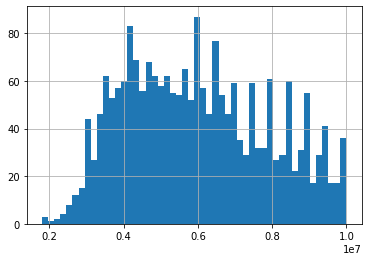

In [173]:
analysis_1_10000['last_price'].hist(bins = 50)

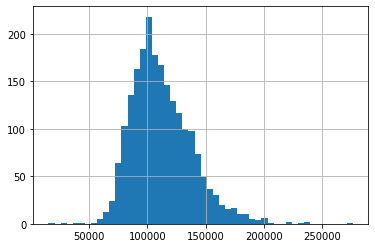

In [174]:
analysis_1_10000['price_square_meter'].hist(bins = 50)

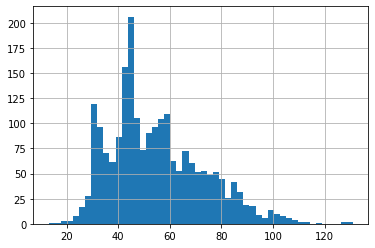

In [175]:
analysis_1_10000['total_area'].hist(bins = 50)

In [176]:
analysis_1_20000.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,day,month,year,price_square_meter,numeral_selected_floor,ratio_living_total,ratio_kitchen_total
total_images,1.000000,0.195736,0.099251,0.063956,-0.007090,-0.006073,0.080509,0.014176,0.017140,-0.020586,...,-0.002063,-0.016978,0.079465,0.008668,0.002486,0.162360,0.149093,0.006480,0.004647,-0.057076
last_price,0.195736,1.000000,0.789079,0.507644,0.049162,0.218462,0.628206,0.122506,-0.002782,-0.089785,...,0.079005,-0.003401,0.095902,0.005012,-0.009975,0.081798,0.313863,0.014432,0.044057,-0.258274
total_area,0.099251,0.789079,1.000000,0.796306,0.036549,0.051745,0.896151,-0.003849,-0.004726,-0.116255,...,0.057516,0.006703,0.009776,-0.006932,0.002243,-0.046969,-0.304110,-0.040998,0.261022,-0.512490
rooms,0.063956,0.507644,0.796306,1.000000,-0.005068,-0.250798,0.914796,-0.193996,-0.009186,-0.078044,...,-0.021106,-0.011794,0.039135,0.002581,-0.005272,-0.013586,-0.439817,-0.065439,0.635538,-0.703985
ceiling_height,-0.007090,0.049162,0.036549,-0.005068,1.000000,0.040903,0.008452,0.028304,0.004819,0.005743,...,0.009405,-0.010215,-0.001916,-0.000030,-0.006527,-0.011055,0.023830,0.004008,-0.041605,0.029669
floors_total,-0.006073,0.218462,0.051745,-0.250798,0.040903,1.000000,-0.163238,0.610043,0.004552,0.072401,...,-0.009658,0.000827,-0.038050,-0.003884,0.002903,-0.032333,0.295930,0.034057,-0.449977,0.408344
living_area,0.080509,0.628206,0.896151,0.914796,0.008452,-0.163238,1.000000,-0.139351,-0.014107,-0.067501,...,0.009320,0.001128,0.027847,-0.003148,-0.003647,-0.025853,-0.395297,-0.051807,0.644743,-0.671882
floor,0.014176,0.122506,-0.003849,-0.193996,0.028304,0.610043,-0.139351,1.000000,0.001366,0.036677,...,-0.004282,0.006603,-0.029228,0.007164,0.012643,-0.028517,0.221363,0.378534,-0.299997,0.277783
is_apartment,0.017140,-0.002782,-0.004726,-0.009186,0.004819,0.004552,-0.014107,0.001366,1.000000,-0.002128,...,-0.008103,-0.009142,0.021858,0.006558,-0.003483,0.019795,0.003513,-0.008334,-0.018498,0.026344
studio,-0.020586,-0.089785,-0.116255,-0.078044,0.005743,0.072401,-0.067501,0.036677,-0.002128,1.000000,...,-0.003331,0.005961,-0.007339,-0.018981,0.009595,0.002136,0.075822,-0.002168,0.099526,0.181967


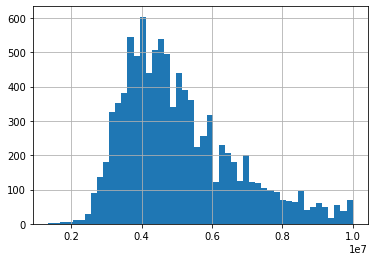

In [177]:
analysis_1_20000['last_price'].hist(bins = 50)

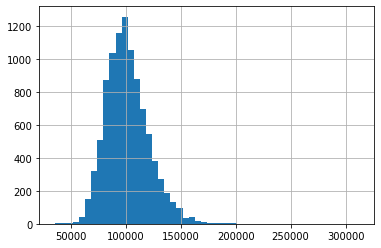

In [178]:
analysis_1_20000['price_square_meter'].hist(bins = 50)

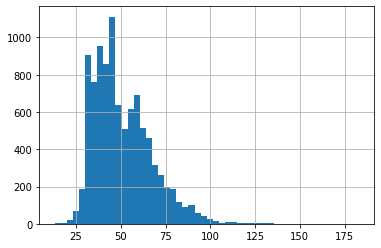

In [179]:
analysis_1_20000['total_area'].hist(bins = 50)

In [180]:
analysis_1_55000.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,day,month,year,price_square_meter,numeral_selected_floor,ratio_living_total,ratio_kitchen_total
total_images,1.000000,0.162323,0.134900,0.113879,0.007178,-0.026601,0.126824,0.008413,0.022723,-0.031580,...,0.006019,-0.010362,0.071860,0.018530,0.004712,0.121435,0.061796,0.033299,0.036765,-0.075528
last_price,0.162323,1.000000,0.650844,0.412882,0.030354,0.218468,0.496739,0.173338,0.078700,-0.071737,...,0.180289,0.269524,0.038018,0.014568,0.001763,0.013529,0.559487,0.027332,-0.044146,-0.135985
total_area,0.134900,0.650844,1.000000,0.815064,0.032359,-0.088043,0.892800,-0.069095,0.050454,-0.126722,...,0.022581,0.048475,0.032195,0.009808,0.001040,-0.032920,-0.218148,0.009188,0.215730,-0.500229
rooms,0.113879,0.412882,0.815064,1.000000,0.004827,-0.220064,0.916546,-0.169357,-0.001631,-0.088271,...,0.011711,0.011511,0.039521,0.015910,-0.008559,-0.025974,-0.339509,-0.008185,0.577170,-0.661713
ceiling_height,0.007178,0.030354,0.032359,0.004827,1.000000,0.008093,0.029149,0.002676,0.083036,-0.001550,...,0.021391,-0.008316,0.013446,-0.004769,-0.001275,0.010828,0.008463,0.017589,0.005571,0.010274
floors_total,-0.026601,0.218468,-0.088043,-0.220064,0.008093,1.000000,-0.202784,0.706184,-0.032346,0.104167,...,-0.012694,0.007747,-0.049469,-0.010097,0.028870,0.011840,0.420517,-0.008405,-0.302459,0.405157
living_area,0.126824,0.496739,0.892800,0.916546,0.029149,-0.202784,1.000000,-0.160654,0.024930,-0.084394,...,0.032830,0.023946,0.039995,0.012578,-0.011659,-0.031961,-0.306356,0.000127,0.608245,-0.644635
floor,0.008413,0.173338,-0.069095,-0.169357,0.002676,0.706184,-0.160654,1.000000,-0.018648,0.064407,...,-0.012376,0.008728,-0.028039,-0.010742,0.031248,0.017799,0.327140,0.311003,-0.241598,0.295155
is_apartment,0.022723,0.078700,0.050454,-0.001631,0.083036,-0.032346,0.024930,-0.018648,1.000000,-0.004647,...,-0.015241,0.067215,-0.005865,0.003290,-0.008477,0.022178,0.049536,0.007484,-0.018019,0.004622
studio,-0.031580,-0.071737,-0.126722,-0.088271,-0.001550,0.104167,-0.084394,0.064407,-0.004647,1.000000,...,-0.009269,-0.030133,-0.000340,-0.021268,-0.015637,0.016443,0.079573,-0.012476,0.085181,0.207837


Вывод:
---
   1. В пределлах 5 тысяч м важную роль играет общая стоимость квартиры, а не стоимость ее квадрата. На нее влияют в первую очередь:
      - общая площадь
      - жилая площадь
      - площадь кухни
      - колличество комнат
   2. Стоимость квадратного метра в данном случае не играет существенного влияния при продажи кквартиры в данной группе. Стоимость квадратного метра зависит от:
      - от этажа, на котором распаложенна квартира и этажности дома, от размера кухни
      - наблюдается обратная зависимость от общей площади квартиры и площади жилой части
   3. В диапазоне до 5000 м, присутсвуют квартиры с анамально-высокой общей стоимостью. 
   4. Роль стоимости кв. м при продаже квартир в удалении от центра от 5000 до 10000 повышается. Стоит обратить внимание на следующие факторы:
      - площадь жилой, общей и кухонной
      - количеством комнат
   5. Стоимость квадратного метра в этом диапазоне от 5000 до 10000 м удаления от центра зависит от общей стоимости квартиры, и падает важность этажа, на котором находится квартира, и этажность дома, как и в предыдущем случае наблюдается обратна зависимость от общей площади, площади жилой части и количество комнат.
   6. Для диапзона от 10000 до 20000 тысяч на общую стоимость начинает существенно влиять размер общей, жилой и кухонной площади, стоит обратить внимание на значимость стоимости квадратного метра также незначительно подросла.
   7. Стоимость квадратного метра как и в предыдущем случае зависит от этажности и обратно зависит от общей и жилой площадей. Прямое воздействие оказывает площадь кухни.
   8. Для диапазон более 20000 характеорно влияние на общую стоимость как и в предыдущих случаях их значимость незначительно снижается. 
   9. Для стоимсоти квадратного метра также вырисовается аналогичные тенденции. Однако стоит обратить внимание на значительное повшение значимости наличия прудов и парков в округе возле дома.

------------

# Комментарии

Хорошо)

------------

Теперь сравним квартиры исходя из количества комнат:
----
   - 1 комнтаные
   - 2 комнтаные 
   - 3 комнатные
   - 4 комнатные 
   - 5 и более

Для этого проанализируем квартиры исходя из их расположения общие и пригород

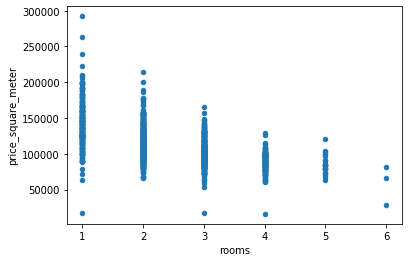

In [181]:
analysis_1_5000.plot(x='rooms', y='price_square_meter', kind='scatter')

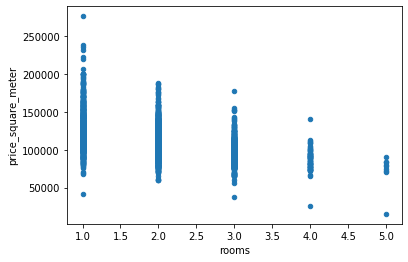

In [182]:
analysis_1_10000.plot(x='rooms', y='price_square_meter', kind='scatter')

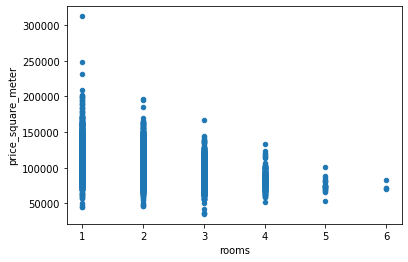

In [183]:
analysis_1_20000.plot(x='rooms', y='price_square_meter', kind='scatter')

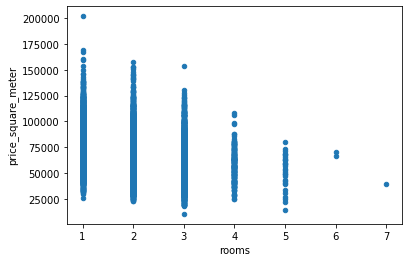

In [184]:
analysis_1_55000.plot(x='rooms', y='price_square_meter', kind='scatter')

из графикоф видно что наиболее дорогой квадрат приходится на однокомнатные квартиры по всех регионам Санкт-Петербурга и его пригородам

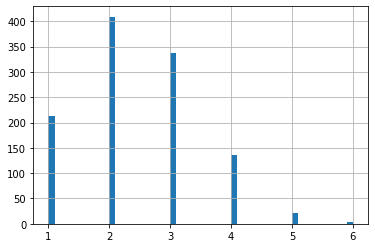

In [185]:
analysis_1_5000['rooms'].hist(bins = 50)

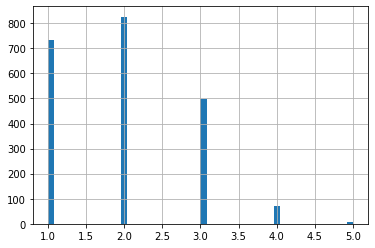

In [186]:
analysis_1_10000['rooms'].hist(bins = 50)

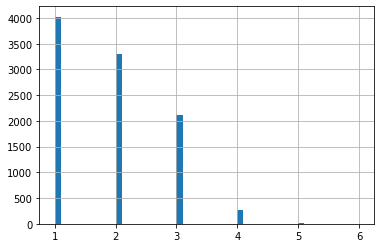

In [187]:
analysis_1_20000['rooms'].hist(bins = 50)

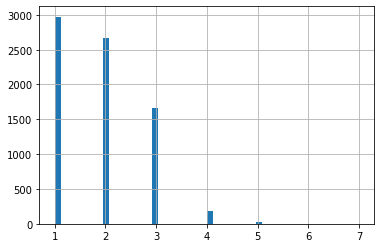

In [188]:
analysis_1_55000['rooms'].hist(bins = 50)

Из анализа видно, что для центра (радиус до 5 км) наибольшим спросом пользуются квартиры двух и трехкомнатные. Эта тенденция начинает меняться в радиусе от 5 до 10 км, лидируещее положение занимают двухкомнатные квартиры, но растет число однокомнатных, которые выходят на второе мест. ачиная от 20 км на перове место выходят однокомнатыне квартиры и двухкомнатные. В первую очередь это связано с общей площадью квартир т.е. в центре пользуются спросом квартиры среднего размера, к окраеене растет спрос на маленькие квартиры, стоимость которых наименьшая.

------------

# Комментарии

Хорошо)

------------

Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.
----

In [189]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23685 entries, 0 to 23698
Data columns (total 32 columns):
building_series_id        23685 non-null object
total_images              23685 non-null int64
last_price                23685 non-null int64
total_area                23685 non-null float64
first_day_exposition      23685 non-null datetime64[ns]
rooms                     23685 non-null int64
ceiling_height            23684 non-null float64
floors_total              23685 non-null int64
living_area               23685 non-null float64
floor                     23685 non-null int64
is_apartment              23685 non-null bool
studio                    23685 non-null bool
area                      23685 non-null float64
open_plan                 23685 non-null bool
kitchen_area              23685 non-null float64
balcony                   23685 non-null int64
locality_name             23685 non-null object
airports_nearest          23685 non-null int64
cityCenters_nearest       2

In [190]:
apartment = data_sales[data_sales['is_apartment'] == True]

In [191]:
apartment.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,day,month,year,price_square_meter,numeral_selected_floor,ratio_living_total,ratio_kitchen_total
total_images,1.000000,0.010795,0.246573,0.323565,-0.291793,0.343473,0.301926,0.330663,NaN,NaN,...,-0.268172,-0.330260,0.204289,0.195901,-0.094779,0.239383,-0.334548,0.049318,0.134676,-0.191541
last_price,0.010795,1.000000,0.810846,0.399182,-0.006028,-0.089131,0.760882,0.119855,NaN,NaN,...,0.419765,-0.032530,-0.093016,-0.080037,0.362592,-0.623562,0.565047,0.315227,0.032593,0.063884
total_area,0.246573,0.810846,1.000000,0.594663,-0.106826,-0.122836,0.938857,0.078247,NaN,NaN,...,0.019116,-0.211219,0.014787,0.000038,0.292867,-0.395564,0.067066,0.354046,0.045314,-0.269307
rooms,0.323565,0.399182,0.594663,1.000000,-0.090707,-0.192703,0.713531,-0.067743,NaN,NaN,...,0.184413,-0.292551,0.041868,0.215004,0.139206,-0.071066,-0.070902,0.202286,0.526378,-0.435834
ceiling_height,-0.291793,-0.006028,-0.106826,-0.090707,1.000000,-0.100968,-0.077869,-0.030511,NaN,NaN,...,0.219779,-0.134372,-0.060642,0.115702,0.017324,0.064094,0.504130,0.195344,0.056764,0.261409
floors_total,0.343473,-0.089131,-0.122836,-0.192703,-0.100968,1.000000,-0.137385,0.826821,NaN,NaN,...,-0.157241,-0.118023,0.048517,-0.140178,-0.027284,-0.148915,-0.065492,-0.021197,-0.190764,0.248340
living_area,0.301926,0.760882,0.938857,0.713531,-0.077869,-0.137385,1.000000,0.043913,NaN,NaN,...,0.087370,-0.241711,-0.034481,0.101734,0.232314,-0.380466,0.059610,0.318342,0.360341,-0.343492
floor,0.330663,0.119855,0.078247,-0.067743,-0.030511,0.826821,0.043913,1.000000,NaN,NaN,...,-0.092355,-0.081493,0.170523,-0.153933,0.038740,-0.223770,0.084276,0.304561,-0.191618,0.132977
is_apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для апартаментов важны в той или иной степени все факторы:
   -  влияние оказывает:
      - Общая площадь, жилая площадь
      - расположение квартиры
      - наличие парков и прудов поблизости
      - увеличивается степень удаленности от аэропорта

In [192]:
studio = data_sales[data_sales['studio'] == True]

In [193]:
studio.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,day,month,year,price_square_meter,numeral_selected_floor,ratio_living_total,ratio_kitchen_total
total_images,1.000000,0.145381,0.061539,-0.017781,-0.117785,-0.004006,0.070405,-0.036449,NaN,NaN,...,-0.065274,-0.082429,-0.022589,-0.013331,0.020967,0.071493,0.202451,-0.029367,0.102943,-0.077750
last_price,0.145381,1.000000,0.857773,0.665547,0.447912,-0.171427,0.741941,-0.060991,NaN,NaN,...,0.114728,0.269648,0.080513,0.083858,0.098922,-0.022329,0.589725,0.152572,-0.022857,-0.630421
total_area,0.061539,0.857773,1.000000,0.812338,0.520906,-0.252041,0.889014,-0.173743,NaN,NaN,...,0.141636,0.166538,0.090386,0.078065,0.091242,-0.087043,0.129559,0.069648,-0.024596,-0.827856
rooms,-0.017781,0.665547,0.812338,1.000000,0.728181,-0.263502,0.853964,-0.141643,NaN,NaN,...,0.287125,0.136514,-0.043957,0.036456,0.049124,-0.078206,0.084609,0.030051,0.134228,-0.535551
ceiling_height,-0.117785,0.447912,0.520906,0.728181,1.000000,-0.317917,0.659328,-0.130985,NaN,NaN,...,0.344335,0.197077,0.030053,0.072692,0.063162,-0.010509,0.153874,0.111797,0.214688,-0.310449
floors_total,-0.004006,-0.171427,-0.252041,-0.263502,-0.317917,1.000000,-0.277133,0.497593,NaN,NaN,...,-0.167285,-0.096096,-0.048503,-0.166135,-0.064574,-0.041974,0.059401,0.111760,-0.138384,0.049785
living_area,0.070405,0.741941,0.889014,0.853964,0.659328,-0.277133,1.000000,-0.203805,NaN,NaN,...,0.244933,0.144829,0.041938,0.083225,0.088235,-0.078035,0.109139,0.060164,0.403663,-0.713487
floor,-0.036449,-0.060991,-0.173743,-0.141643,-0.130985,0.497593,-0.203805,1.000000,NaN,NaN,...,-0.075439,-0.144065,0.068828,-0.254060,-0.104826,-0.018684,0.162397,0.409092,-0.146115,0.088535
is_apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Студии в своей зависимости повторяют тенденции, которые были характерны для квартир

In [194]:
open_plan = data_sales[data_sales['open_plan'] == True]

In [195]:
open_plan.corr()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,...,ponds_around3000,ponds_nearest,days_exposition,day,month,year,price_square_meter,numeral_selected_floor,ratio_living_total,ratio_kitchen_total
total_images,1.000000,-0.112718,-0.100886,-0.071430,-0.004067,-0.122234,-0.079293,-0.113385,NaN,NaN,...,-0.166129,0.136390,-0.180679,0.042667,0.232423,0.024443,-0.088049,-0.078944,0.058113,0.021531
last_price,-0.112718,1.000000,0.896923,0.790895,-0.011470,-0.132951,0.757190,-0.068593,NaN,NaN,...,0.487477,0.049630,0.037392,-0.235027,-0.187787,-0.281631,0.786083,-0.005855,-0.196411,-0.536406
total_area,-0.100886,0.896923,1.000000,0.940583,-0.033932,-0.247193,0.922721,-0.147570,NaN,NaN,...,0.390486,0.029409,0.143335,-0.170831,-0.293621,-0.489788,0.539862,0.013001,-0.260154,-0.804915
rooms,-0.071430,0.790895,0.940583,1.000000,-0.018998,-0.341950,0.933167,-0.203847,NaN,NaN,...,0.397298,0.050435,0.137074,-0.150478,-0.262175,-0.508362,0.457469,-0.011284,-0.138744,-0.710315
ceiling_height,-0.004067,-0.011470,-0.033932,-0.018998,1.000000,0.147310,-0.033077,0.143731,NaN,NaN,...,-0.037464,-0.077958,-0.068561,0.156389,0.024699,0.013405,0.055520,-0.004990,-0.002159,0.052309
floors_total,-0.122234,-0.132951,-0.247193,-0.341950,0.147310,1.000000,-0.217359,0.534952,NaN,NaN,...,-0.146909,0.004233,0.116009,0.034419,0.023756,0.150236,0.052222,0.190195,0.231606,0.128660
living_area,-0.079293,0.757190,0.922721,0.933167,-0.033077,-0.217359,1.000000,-0.145888,NaN,NaN,...,0.331464,0.080776,0.140020,-0.150544,-0.230186,-0.487280,0.472331,-0.025748,0.067638,-0.767901
floor,-0.113385,-0.068593,-0.147570,-0.203847,0.143731,0.534952,-0.145888,1.000000,NaN,NaN,...,-0.174816,-0.010085,0.119873,-0.026919,0.112490,0.057191,0.115281,0.502006,0.094899,0.061292
is_apartment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
studio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Для квартир со свободной планеровкой наблюдается очень интересная картина:
   1. Как для обычных квартир для них важна площадь и жилая площадь. 
   2. Очень незначительное влияние площади кухни
   3. Среднее влияние наличие парков и прудов
   4. Отрицательное влияние соотношение общей палощади жилой и площади куни
   
   

На стоимость квадратного метра оказывает прямое влиение (_в отличии от стандартных квартир_):
   - общая площадь, размер жилой площади, так же существенно влияеет нахождение парков и прудов.

In [196]:
data_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23685 entries, 0 to 23698
Data columns (total 32 columns):
building_series_id        23685 non-null object
total_images              23685 non-null int64
last_price                23685 non-null int64
total_area                23685 non-null float64
first_day_exposition      23685 non-null datetime64[ns]
rooms                     23685 non-null int64
ceiling_height            23684 non-null float64
floors_total              23685 non-null int64
living_area               23685 non-null float64
floor                     23685 non-null int64
is_apartment              23685 non-null bool
studio                    23685 non-null bool
area                      23685 non-null float64
open_plan                 23685 non-null bool
kitchen_area              23685 non-null float64
balcony                   23685 non-null int64
locality_name             23685 non-null object
airports_nearest          23685 non-null int64
cityCenters_nearest       2

------------

# Комментарии

Хорошо)

------------

Отчет о проделанной работе
---
   1. Убраны пропуски в столбцах:
      - _ceiling_height_
      - _floors_total_
      - _living_area _
      - _floor_
      - _kitchen_area_
      - _balcony_
      - _airports_nearest_
      - _cityCenters_nearest_
      - _parks_around3000_
      - _parks_nearest _
      - _ponds_around3000_
      - _ponds_nearest_
      - _days_exposition_
   2. Было определено наличие значение 0 в столбике _rooms_ и произведена их замена исходч из средней площади одной комнаты
   3. Изменены форматы данных в столбцах:
      - _first_day_exposition_
      - _last_price_
      - _floors_total_
      - _balcony_
      - _rooms_
      - _airports_nearest_
      - _cityCenters_nearest_
      - _parks_around3000_
      - _parks_nearest_
      - _ponds_around3000_
      - _ponds_nearest_
      - _days_exposition_
   4. Были добавлены новые столбики:
      - цену квадратного метра
      - день недели, месяц и год публикации объявления
      - этаж, на котором расположена квартира; варианты — первый, последний, другой
      - соотношение жилой и общей площади, а также отношение площади кухни к общей
   5. Получены ответы на следующие вопросы:
      - Каковы типичные параметры продаваемых квартир (например, площадь, цена)? Укажите наиболее важные характеристики и постройте графики. Сколько обычно длится процесс продажи? 
      -  - Какие факторы больше всего влияют на стоимость квартиры? Отдельно изучите, зависит ли цена квадратного метра от числа комнат, этажа (первого или последнего), удалённости от центра и даты размещения: дня недели, месяца и года.
         - Типичныим критериями продажи квартир являются: _общая плщадь, общая стоимость, площадь кухни, жилая площадь,
         - Процесс продаж в первую очередь зависит от года кода эта квартира выставлялсь. Наиболее длительный процесс характерен для 2014 г. наиболее быстрый для 2019 г. __(в первую очередь связана с ожиданиями покупателей в росте цен на квартире, что подтверждается открытыми источниками)__:
            - __2014 - 607 дней__
            - __2015 - 389 дней__
            - __2016 - 114 дней__
            - __2017 - 45 дней__
            - __2018 - 34 дня__
            - __2019 - 12 дней__
         - На __общую стоимость квартиры __ влияет:
            - сильно:
               - _размер общей площади_
            - средне:
               - _размер жилой площади_
               - _количество комнат_
               - _стоимость квадратного метра_
               -  _площадь кухни_
            - слабое влияние:
               - _растояние до парков_
               - _наличие парков до 3000 м_
               - _наличие прудов_
               - _растояние до ближдайшего пруда_
            - обратное сильное влияние:
               - _удаленность от центра (чем дальше от центра, чем ниже общая стоимость)
            - остальные факторы не оказывают существенного влияния
          - __На цену квадратного влияния оказывает__:
            - слабое влияние:
               - _количество этажей_
               - _этаж квартиры_
               - _этаж квартиры_
               - _наличие парков и их близость_
               - _отношение площади к кухне_
               - _площадь кухни_
            - обратное среднее влияние оказывает:
               - _удаленность от центра, т.е. чем дальше от центра, тем меньше стоимость квадрата_
            - обратное слабое влияние:
               - _количество комнат_
               - _жилая площадь_
               - _отношения размера жилой к общей_
               - _общая площадь_
             - остальные факторы не оказывают существенного влияния.
       - __Общий вывод по вопросу.__
             _В ходе анализа было выявлен, что существенное влияние на процесс продажи оказываают три фактора: цена, общая площадь, инфляционные ожидания. Люди не покупают квартиры для получения долгосрочной ренты, спекулятивного долгосрочного характера (повышение стоимости квадратного метра) или в качестве капитального вложения. Основным требованием людей является обеспечения себя жильем по приемлемой стоимости._      
     

   - Уберите квартиры с очень высокой ценой и другими необычными параметрами. Опишите, какие особенности обнаружили.
         - обнаружили, что среди объявлений существуют как квартиры с очень низкой стоимостью так и  с очень высокой. Из открытых источников известно, что минимальные цены в 2019 г. начинаются от 1.6 млн. рублей, однако у нас данные начинаются с 2014. С учетом инфляционной поправки установим минимальную цену равную 1,3 млн. руб. Максимальную цену уменьшили до 10 млн руб.
     

   - Что можно сказать о цене квадратного метра в пригородах? Выберите 10 населённых пунктов с наибольшим числом объявлений. Эти данные можно отличить по имени в столбце 'locality_name'.
      - На цену квадратного влияния оказывает:
         - общая стоимость квартиры оказывает среднее влияние
      - слабое влияние:
         - количество этажей
         - этаж квартиры
         - наличие парков и их близость
         - наличие прудов и их близость
         - отношение площади к кухне
      - обратное среднее влияние оказывает:
         - удаленность от центра, т.е. чем дальше от центра, тем меньше стоимость квадрата
      - обратное слабое влияние:
         - количество комнат 
         - жилая площадь
         - отношения размера жилой к общей
         - общая площадь
      - остальные факторы не оказывают существенного влияния.
      - Как изменились харктеристики при анализе:
         - снизилось влияние общей стоимости квартиры
         - снизилось влияние этажности дома и нахождения квартиры на этаже
         - снизилось влияние размера кухни на стоимость квадратного ментра
         - возрасло значение близкого нахждения парков, прудов в 20 минутной доступности
         - Обратная свзяь показало значение изменение таких факторов как удаленность от центра, наличие аэропортаотношение жилой к общей
         - стоит обратить влияние на возрастание обратного влияния общей площади и жилой, и, как соотвествие, их соотношения 


   - Выделите сегменты типичных квартир в центре (по удалённости, числу комнат и площади) и вне центра. Границы определите самостоятельно. Выберите достаточно крупные сегменты с не менее 1000 объявлений. Сравните корреляцию основных факторов с ценой по всем предложениям и объявлениям в вашей выборке.
        1. В пределлах 5 тысяч м важную роль играет общая стоимость квартиры, а не стоимость ее квадрата. На нее влияют в первую очередь:
           - общая площадь
           - жилая площадь
           - площадь кухни
           - колличество комнат
        2. Стоимость квадратного метра в данном случае не играет существенного влияния при продажи кквартиры в данной группе. Стоимость квадратного метра зависит от:
           - от этажа, на котором распаложенна квартира и этажности дома, от размера кухни
           - наблюдается обратная зависимость от общей площади квартиры и площади жилой части
        3. В диапазоне до 5000 м, присутсвуют квартиры с анамально-высокой общей стоимостью. 
        4. Роль стоимости кв. м при продаже квартир в удалении от центра от 5000 до 10000 повышается. Стоит обратить внимание на следующие факторы:
           - площадь жилой, общей и кухонной
           - количеством комнат
        5. Стоимость квадратного метра в этом диапазоне от 5000 до 10000 м удаления от центра зависит от общей стоимости квартиры, и падает важность этажа, на котором находится квартира, и этажность дома, как и в предыдущем случае наблюдается обратна зависимость от общей площади, площади жилой части и количество комнат.
        6. Для диапзона от 10000 до 20000 тысяч на общую стоимость начинает существенно влиять размер общей, жилой и кухонной площади, стоит обратить внимание на значимость стоимости квадратного метра также незначительно подросла.
        7. Стоимость квадратного метра как и в предыдущем случае зависит от этажности и обратно зависит от общей и жилой площадей. Прямое воздействие оказывает площадь кухни.
        8. Для диапазон более 20000 характеорно влияние на общую стоимость как и в предыдущих случаях их значимость незначительно снижается. 
        9. Для стоимсоти квадратного метра также вырисовается аналогичные тенденции. Однако стоит обратить внимание на значительное повшение значимости наличия прудов и парков в округе возле дома.
        10. Из анализа видно, что для центра (радиус до 5 км) наибольшим спросом пользуются квартиры двух и трехкомнатные. Эта тенденция начинает меняться в радиусе от 5 до 10 км, лидируещее положение занимают двухкомнатные квартиры, но растет число однокомнатных, которые выходят на второе мест. Начиная от 20 км на перове место выходят однокомнатыне квартиры и двухкомнатные. В первую очередь это связано с общей площадью квартир т.е. в центре пользуются спросом квартиры среднего размера, к окраене растет спрос на маленькие квартиры, стоимость которых наименьшая.
      

   - Подберите наиболее характерные параметры для апартаментов, студий и квартир свободной планировки. Влияют ли они на цену? Сравните со схожими параметрами квартир типовой планировки.
      1. Для апартаментов важны в той или иной степени все факторы:
         -  влияние оказывает:
            - общая площадь, жилая площадь
            - расположение квартиры 
            - наличие парков и прудов поблизости
            - увеличивается степень удаленности от аэропорта
      2. Студии в своей зависимости повторяют тенденции, которые были характерны для квартир
      3. Для квартир со свободной планеровкой наблюдается очень интересная картина: 
         - Как для обычных квартир для них важна площадь и жилая площадь
         - Очень незначительное влияние площади кухни
         - Среднее влияние наличие парков и прудов 
         - Отрицательное влияние соотношение общей палощади жилой и площади куни
         - На стоимость квадратного метра оказывает прямое влиение _(в отличии от стандартных квартир)_: общая площадь, размер жилой площади, так же существенно влияеет нахождение парков и прудов.

Рекомендации
---
   1. Для продовца квартиры:
   

------------

# Комментарии

Отлично! ты справился с проектом)

В этот раз ты даешь больше комментариев, пояснений, чем в первом проекте. Спасибо :) но все же местами их не хватает :( не опускай, пожалуйста, описание операций, которые ты выполняешь.

Хорошее резюме того, что было сделано в работе :) но похоже, что ты не успел его дописать.

В целом, при выполнении работы, старайся делать код более универсальным. То есть не вводи руками отдельно рассчитанные значения, а заменяй их формулами расчета. Это позволит избавиться от опечаток и упростить последующее внесение изменений.

Старайся автоматизировать свои действия, когда есть такая возможность. Не стоит выполнять одну и туже операцию с разными столбцами отдельно, старайся написать функцию для обхода всего датасета или его части. Так у тебя будет уходить меньше времени на реализацию кода, ты будешь меньше уставать от однотипной работы и твой код будет выглядеть более аккуратным. Тоже самое касается и вывода графиков :)

Постарайся сначала описывать все данные и разбираться в структуре пропусков, прежде чем вносить какие-то изменения и выбирать метод заполнения данных. Лучше просмотреть все данные, определить все проблемы, понять как с ними бороться (наметить план действий), а потом вносить изменения. Это поможет избавиться от возможных ошибок неверного связывания данных и их заполнения, позволит лучше понять данные и как с ними работать.

Смотри комментарии внутри проекта :)

***Успехов !!!***

------------

In [197]:
data = pd.read_csv('/datasets/real_estate_data_old.csv', sep = '\t')

In [198]:
data.head()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,1564812,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,NaN,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,Сталинский,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,NaN,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,NaN,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [199]:
data.tail()

,building_series_id,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
23694,1564812.0,9,9700000.0,133.81,2017-03-21T00:00:00,3,3.7,5.0,73.3,3,...,13.83,NaN,Санкт-Петербург,24665.0,4232.0,1.0,796.0,3.0,381.0,NaN
23695,NaN,14,3100000.0,59.00,2018-01-15T00:00:00,3,NaN,5.0,38.0,4,...,8.50,NaN,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,NaN,18,2500000.0,56.70,2018-02-11T00:00:00,2,NaN,3.0,29.7,1,...,NaN,NaN,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23697,NaN,13,11475000.0,76.75,2017-03-28T00:00:00,2,3.0,17.0,NaN,12,...,23.30,2.0,Санкт-Петербург,39140.0,10364.0,2.0,173.0,3.0,196.0,602.0
23698,NaN,4,1350000.0,32.30,2017-07-21T00:00:00,1,2.5,5.0,12.3,1,...,9.00,NaN,поселок Новый Учхоз,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [201]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000

In [202]:
missing_list=[]
for x in data:
    if len(data[data[x].isnull()])>0:
        missing_list.append(x)
print(missing_list)

['building_series_id', 'ceiling_height', 'floors_total', 'living_area', 'is_apartment', 'kitchen_area', 'balcony', 'locality_name', 'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']


In [203]:
missing_perc=[]
for x in missing_list:
    missing_perc.append([x,(len(data[data[x].isnull()])/len(data))])
missing_perc=pd.DataFrame(missing_perc,columns=['column','missing %'])
missing_perc.sort_values(by=['missing %'],ascending=False)

,column,missing %
4,is_apartment,0.882906
0,building_series_id,0.725009
11,parks_nearest,0.659100
13,ponds_nearest,0.615596
6,balcony,0.486054
1,ceiling_height,0.387991
8,airports_nearest,0.233850
9,cityCenters_nearest,0.232879
10,parks_around3000,0.232837
12,ponds_around3000,0.232837


In [204]:
len(missing_list)/len(data.columns)

0.625

In [205]:
data.duplicated().sum()

0

In [206]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0


In [207]:
data.groupby(['balcony'])['balcony'].count()

balcony
0.0    3758
1.0    4195
2.0    3659
3.0      81
4.0     183
5.0     304
Name: balcony, dtype: int64

In [208]:
data['balcony'] = data['balcony'].fillna(0)

In [209]:
data['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [210]:
data['last_price'] = data['last_price'].astype('int')

In [211]:
data['is_apartment'].value_counts()

False    2725
True       50
Name: is_apartment, dtype: int64

In [212]:
data[data['is_apartment']==True].describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,50.0,1.116000e+01,5.963700e+00,0.00,8.000000e+00,11.00,16.00,20.0
last_price,50.0,1.292420e+07,1.616967e+07,2150000.00,4.815750e+06,6900000.00,12467675.25,84000000.0
total_area,50.0,8.332580e+01,7.401575e+01,20.10,4.780000e+01,64.00,95.95,507.0
rooms,50.0,2.080000e+00,1.209486e+00,1.00,1.000000e+00,2.00,3.00,7.0
ceiling_height,44.0,6.313864e+00,1.521378e+01,2.50,2.800000e+00,3.00,3.20,100.0
floors_total,50.0,6.900000e+00,5.218687e+00,2.00,4.000000e+00,5.00,7.00,27.0
living_area,42.0,4.797952e+01,4.946297e+01,13.92,2.042250e+01,33.25,55.70,301.5
floor,50.0,4.480000e+00,3.965360e+00,1.00,2.000000e+00,3.00,5.00,22.0
area,50.0,8.332580e+01,7.401575e+01,20.10,4.780000e+01,64.00,95.95,507.0
kitchen_area,35.0,1.772743e+01,1.574955e+01,5.00,1.000000e+01,11.70,20.00,87.2


In [213]:
data['is_apartment'] = data['is_apartment'].fillna(False)
data['is_apartment'].value_counts()

False    23649
True        50
Name: is_apartment, dtype: int64

In [227]:
data['parks_nearest'] = data['parks_nearest'].fillna(value=0)
data['ponds_nearest'] = data['ponds_nearest'].fillna(value=0)

In [228]:
data['parks_around3000'] = data['parks_around3000'].fillna(0)
data['parks_around3000'] = data['parks_around3000'].astype(int)
data['parks_around3000'].value_counts()

0    15624
1     5681
2     1747
3      647
Name: parks_around3000, dtype: int64

In [229]:
data['ponds_around3000'] = data['ponds_around3000'].fillna(0)
data['ponds_around3000'] = data['ponds_around3000'].astype(int)
data['ponds_around3000'].value_counts()

0    14589
1     5717
2     1892
3     1501
Name: ponds_around3000, dtype: int64

In [230]:
data['living_area'] = data['living_area'].fillna(data['living_area'].mean())

In [232]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())

In [233]:
len(data[data['cityCenters_nearest'].isna()])

5519

In [234]:
data[data['cityCenters_nearest'].isna()]['locality_name'].unique()

array(['городской посёлок Янино-1', 'посёлок Мурино', 'Сертолово',
       'деревня Кудрово', 'Коммунар',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кировск',
       'деревня Новое Девяткино', 'Санкт-Петербург',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'деревня Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск',
       'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Сясьстрой', 'деревня Старая', 'деревня Лесколово',
       'посёлок Новый Свет', 'Сланцы', 'село Путилово', 'Ивангород',
       'Мурино', 'Шлиссельбург', 'Никольское', 'Сосновый Бор',
       'поселок Новый Свет', 'деревня Оржицы', 'деревня Кальтино',
 

In [235]:
data[data['cityCenters_nearest'].isna()]['locality_name'].tolist()

['городской посёлок Янино-1',
 'посёлок Мурино',
 'Сертолово',
 'деревня Кудрово',
 'Коммунар',
 'поселок городского типа Красный Бор',
 'посёлок Мурино',
 'Гатчина',
 'посёлок Мурино',
 'Сертолово',
 'Гатчина',
 'поселок Мурино',
 'деревня Фёдоровское',
 'Выборг',
 'Кировск',
 'Кировск',
 'деревня Новое Девяткино',
 'Санкт-Петербург',
 'Кировск',
 'посёлок городского типа Лебяжье',
 'посёлок городского типа Сиверский',
 'поселок Молодцово',
 'поселок городского типа Кузьмоловский',
 'Выборг',
 'садовое товарищество Новая Ропша',
 'деревня Пикколово',
 'Всеволожск',
 'Волхов',
 'Кингисепп',
 'Приозерск',
 'посёлок Мурино',
 'поселок городского типа Кузьмоловский',
 'деревня Куттузи',
 'посёлок Мурино',
 'посёлок Аннино',
 'городской посёлок Янино-1',
 'поселок городского типа Ефимовский',
 'посёлок Плодовое',
 'деревня Заклинье',
 'поселок Торковичи',
 'посёлок городского типа Сиверский',
 'Гатчина',
 'поселок Первомайское',
 'посёлок Мурино',
 'Сясьстрой',
 'Всеволожск',
 'посёлок Мур

In [236]:
filter1=data['cityCenters_nearest'].isna()
filter2=data.locality_name=='Санкт-Петербург'

In [237]:
data[filter1&filter2].T

,81,593,604,742,795,1336,1872,1895,2364,2707,...,19870,19998,20104,20977,21399,21668,21881,21955,22554,22628
building_series_id,NaN,1564792.0,1564812.0,NaN,NaN,NaN,NaN,NaN,NaN,1564812.0,...,NaN,1564812.0,NaN,NaN,1564812.0,NaN,1564812.0,NaN,NaN,1564812.0
total_images,9,20,11,7,19,12,13,12,17,14,...,8,16,14,9,16,9,15,19,5,8
last_price,10949000,4200000,9899000,37000000,7100000,18500000,3100000,9500000,4300000,5650000,...,4400000,6000000,6300000,29849500,5500000,4500000,44500000,130000000,3415000,8600000
total_area,68,38.3,101,161,59.6,66,32,130,32.6,51,...,50,32,58,175,42,34.3,169,431,31.65,74.9
first_day_exposition,2018-12-27T00:00:00,2019-04-16T00:00:00,2018-12-12T00:00:00,2016-05-22T00:00:00,2019-02-13T00:00:00,2017-06-08T00:00:00,2019-03-15T00:00:00,2019-03-27T00:00:00,2019-04-28T00:00:00,2019-02-26T00:00:00,...,2017-05-12T00:00:00,2019-02-26T00:00:00,2017-02-12T00:00:00,2018-12-17T00:00:00,2018-03-26T00:00:00,2019-03-04T00:00:00,2019-02-28T00:00:00,2017-10-02T00:00:00,2019-04-16T00:00:00,2019-03-14T00:00:00
rooms,1,1,3,3,2,1,1,5,1,2,...,2,1,2,3,1,1,3,7,1,3
ceiling_height,2.65,2.6,3,2.65,3.4,3,2.65,2.65,2.65,3.2,...,2.65,2.7,2.6,2.65,3,2.65,3.3,3.7,2.65,3
floors_total,10,16,5,9,5,7,4,5,25,9,...,12,16,6,9,5,9,9,8,24,5
living_area,34.4579,19.8,62,84,36.6,25,19,90,14.3,31,...,31,14.5,33.4,34.4579,10.5,17.5,101,220,34.4579,53.2
floor,6,10,3,8,2,7,2,2,17,5,...,4,7,3,8,1,3,7,5,14,4


In [238]:
data.total_area=data.total_area.astype(int)

In [239]:
data['price_sq_meter'] = round(data['last_price'] / data['total_area'])
data['price_sq_meter']

0        120370.0
1         83750.0
2         92786.0
3        408176.0
4        100000.0
           ...   
23694     72932.0
23695     52542.0
23696     44643.0
23697    150987.0
23698     42188.0
Name: price_sq_meter, Length: 23699, dtype: float64

In [240]:
data['first_day_exposition'].describe()

count                   23699
unique                   1491
top       2018-02-01T00:00:00
freq                      368
Name: first_day_exposition, dtype: object

In [241]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'])
data['first_day_exposition'].describe()

count                   23699
unique                   1491
top       2018-02-01 00:00:00
freq                      368
first     2014-11-27 00:00:00
last      2019-05-03 00:00:00
Name: first_day_exposition, dtype: object

In [242]:
data['weekday'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
data[['first_day_exposition','weekday','month','year']].head()

,first_day_exposition,weekday,month,year
0,2019-03-07,3,3,2019
1,2018-12-04,1,12,2018
2,2015-08-20,3,8,2015
3,2015-07-24,4,7,2015
4,2018-06-19,1,6,2018


In [243]:
def make_floor_type(row):
    if row['floor'] == 1:   
        return 'первый'   
    if row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'
data['floor_type'] = data.apply(make_floor_type, axis=1)

In [244]:
data['living_area_share'] = round((data['living_area'] / data['total_area']), 2)
data['kitchen_area_share'] = round((data['kitchen_area'] / data ['total_area']),2)

In [245]:
data.duplicated().sum()

0

In [246]:
import plotly.express as px
import plotly.graph_objects as go

In [247]:
parameters=['total_area','last_price','rooms','ceiling_height','ceiling_height','days_exposition']

In [249]:
for x in parameters:
    fig = px.histogram(data[x], x=x,
                   color_discrete_sequence=['maroon'],
                  title='Distribution of {}'.format(x),
                 )
    fig.update_layout(
        showlegend=True,
        annotations=[
            go.layout.Annotation(
                text='max={},min={},median={},mean={}'.format(data[x].max(),data[x].min(),data[x].median(),data[x].mean()),
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=0.95,
                y=0.95,
                bordercolor='black',
                borderwidth=2
            )
        ]
    )

    fig.show()

AttributeError: 'Series' object has no attribute 'columns'